<a href="https://colab.research.google.com/github/yuwotmate/Machine-Learning-Journey/blob/main/Regression_AIML_V2_(7_6_2022).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Things to get done



1.   Brief EDA ( not impt for now )
2.   Implement Log scaling when modeling
3. Explain how you use phik matrik 
4. Hyperparam tuning for regression
5. Explain error ( this one has a few options refer to senior work residue plot etc )
6. Explain which evaluation metrics you used and why
7. How you select model
8. Try implementing spliting data using context to reduce column
9. Recursive feature elimiate 
10. Technical paper
11. Baseline Model
12. Maybe pipeline idk




# PC Price Predictions 

Author: Kaleb Nim

## Project Objective

> Build a Regression machine learning model to predict the computer 
price based on their configuration.

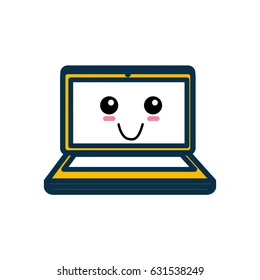

## The Prediction Task

####**How is the prediction task defined?**


> We are given a dataset containing PC sale prices from a PC website and other attribute of each PC sale. The prediction task is to create a predictive regression model to predict the PC prices based of the PC attribute given like CPU, Weight, ScreenSize Etc.




#### **What is the meaning of the output variable?**


> The output variable is `price`, refering to the price of the PC sold in dollars ($). The variable is numerical-continuous variable, as such the prediction task requires a regression model.



# Project initialization

## Importing dependencies and libraries

In [41]:
%matplotlib inline 

In [1]:
!pip uninstall sklearn -y
!pip install Cython
!pip install -U scikit-learn
!pip install phik


Found existing installation: sklearn 0.0
Uninstalling sklearn-0.0:
  Successfully uninstalled sklearn-0.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 690 kB 5.0 MB/s 
     |████████████████████████████████| 38.1 MB 390 kB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# plt.rcParams.update({'figure.max_open_warning': 0}) # Removes max 20 graph limit
import seaborn as sns
import time as time

# EDA
import plotly.express as px
from sklearn.feature_selection import chi2, RFECV
import scipy.stats as ss
from pandas_profiling import ProfileReport
import phik
from phik import resources, report

# Evalutation Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error ,r2_score ,mean_squared_log_error,mean_absolute_percentage_error

# Date preprocessing
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer ,SimpleImputer ,IterativeImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler ,OneHotEncoder,FunctionTransformer , MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold, learning_curve ,cross_val_score ,GridSearchCV,KFold,RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.decomposition import PCA

#Models
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso ,SGDRegressor ,ElasticNet ,BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor
from sklearn.svm import LinearSVR ,SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.neighbors import KNeighborsRegressor



## Load Dataset

In [3]:
df_raw = pd.read_csv('/content/drive/MyDrive/Datasets/pc_data (regression).csv')
df_raw

,Product ID,Brand,Type,Screen Size,Screen Specs,CPU,RAM,Hard Disk,GPU,Operating System,Weight,Price ($)
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,3568.93416
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,2394.77616
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,1531.80000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,6759.76680
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,4804.79040
...,...,...,...,...,...,...,...,...,...,...,...,...
15315,15315,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,1706.40200
15316,15316,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,4000.10600
15317,15317,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,616.82600
15318,15318,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,2042.06600


## Data Dictonary

|     **Column**     	|                                **Description**                               	|
|:------------------:	|:----------------------------------------------------------------------------:	|
| Product ID        	| unique identifier ranging from 0 to 15319                                  	|
| Brand         	| Brand of the PC                                    	|
| Type            	| PC type, such as notebook, ultrabook     	|
| Screen Size          	| Size of the PC screen                     	|
| Screen Specs          	| PC screen specs with resolution                                                	|
| CPU     	| CPU infomation of the PC                            	|
|RAM             	| RAM information of the PC                             	|
| Hard Disk          	| Hard Disk information of the PC                  	|
|GPU:              	| Graphic card of the PC                        	|
|Operating System          	| Operating system, such as Windows 10, macOS               	|
|Weight:          	|  Weight of the PC             	|
| **Price** 	| **PC price ($)** 	|

# Prevent Data Leakage 



> **Data leakage** is when information from outside the training dataset is used to create the model. This additional information can allow the model to learn or know something that it otherwise would not know and in turn invalidate the estimated performance of the mode being constructed.
Reference : [data-leakage-machine-learning](https://machinelearningmastery.com/data-leakage-machine-learning/)

To takle this problem I'll be creating a **Final Holdout Dataset** that will be left untouched in all data preprocessing and model training to act as a final sanity check of my finalizated model.

We will be using the conventional **80:20 Split** to initialize. We can change the ratios if we find necessary later on 


In [4]:
# Split dataset into Holdout sets and Training Set (Training set will be split into Train and validation after EDA)
train_df,test_df = train_test_split(df_raw,test_size=0.2,random_state=1)
print(f'Shape of train_df:{train_df.shape}\nShape of test_df:{test_df.shape}')

Shape of train_df:(12256, 12)
Shape of test_df:(3064, 12)


# **Exploratory Data Analysis**

A good data science project starts from understanding our data. With that, I aim to explore deeper on the following aspects: 

*  Univariative Analysis
*  Distribution of Target Variable `Price`
*  Trends between features and target variable Price ($)
*  Correlation between Features
*  Cardinality of Features


will perform some basic visualisation to spot some trends between features and target variable `Price ($)` and errors in the PC dataset.

---

To prevent the mutation of our original data, we will make a copy of our data to perform eda on it.

*EDA process will only be analysed to the train_df*

In [5]:
# Seperate dataframe for EDA only 
df_eda = train_df.copy()

## Identifying Null Values

In [ ]:
percent_missing = df_eda.isnull().sum() * 100 / len(df_eda)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
missing_value_df

,percent_missing
Product ID,0.0
Brand,0.0
Type,0.0
Screen Size,0.0
Screen Specs,0.0
CPU,0.0
RAM,0.0
Hard Disk,0.0
GPU,0.0
Operating System,0.0


Observations: No Null values present in dataset

Conclusion: No need for Imputation of data

## Cardinality of categorical Features



### Identify Categorical Features

In [6]:
s = (df_eda.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['Brand', 'Type', 'Screen Specs', 'CPU', 'RAM', 'Hard Disk', 'GPU', 'Operating System', 'Weight']


#### Observations:
Purely follow the Dtypes of the features

Quantitative Features:


*   `Product ID `
*   `Screen Size`

Categorical Features:


*   `Brand`
*   `Type`
*   `Screen Specs`
*   `CPU`
*   `RAM`
*   `Hard Disk`
*   `Operating System`
*   `GPU`
* `Operating System`
* `Weight`


It is to be noted that features:

Only `Product ID `, `Screen Size`, are **Quantitative** features

The rest of the features:

`Brand`, `Type`, `Screen Specs`, `CPU`,`RAM`, `Hard Disk`, `GPU`, `Operating System`, `Weight`, is a **nominally valued categorical** feature

`RAM`,`Screen Size` 

However Logic dictates that `Weight` Should also be a Quantitative feature. For now we shall just take note of that and will correct that during Feature Processing

### Cardinality values 

In [7]:
# Extracting only categorical features to find Unique values
df_eda[['Brand', 'Type', 'Screen Specs', 'CPU', 'RAM', 'Hard Disk', 'GPU', 'Operating System', 'Weight']].nunique().sort_values()

Type                  6
RAM                   9
Operating System      9
Brand                19
Hard Disk            39
Screen Specs         40
GPU                 110
CPU                 118
Weight              179
dtype: int64

Observations looking at most Most Frequent Values: 

*   No single value for any features
*   CPU has the highest cardinlity, with 118 unique values, extremely similar to GPU , with 110 unique values




 OI RMB PLOT GRAPH THANKS

## Target Variable Distribution: Price ($)

In [ ]:
fig = px.histogram(df_eda, x="Price ($)",title="Distribution of PC Price ($)")
fig.show()

Data seems Highly Positively Skewed 

lets try a log scale

In [ ]:
fig = px.histogram(df_eda, x="Price ($)",log_x=True ,title="Logarithmic distribution of PC Price ($) ")
fig.show()

## Bi-variate Analysis -Phik correlation 𝜙k

Phik correlation (𝜙k) is the latest relatively new correlation metric that is based on several refinements to Pearson’s χ2 (chi-squared) contingency test

Unfortunately there’s isn’t a closed forum formula . Therefore let see a visual representation of how Phik correlation works

This is how Phik compares to pearson's p and cramer's p correlation metric
 
[Phik](https://towardsdatascience.com/phik-k-get-familiar-with-the-latest-correlation-coefficient-9ba0032b37e7)

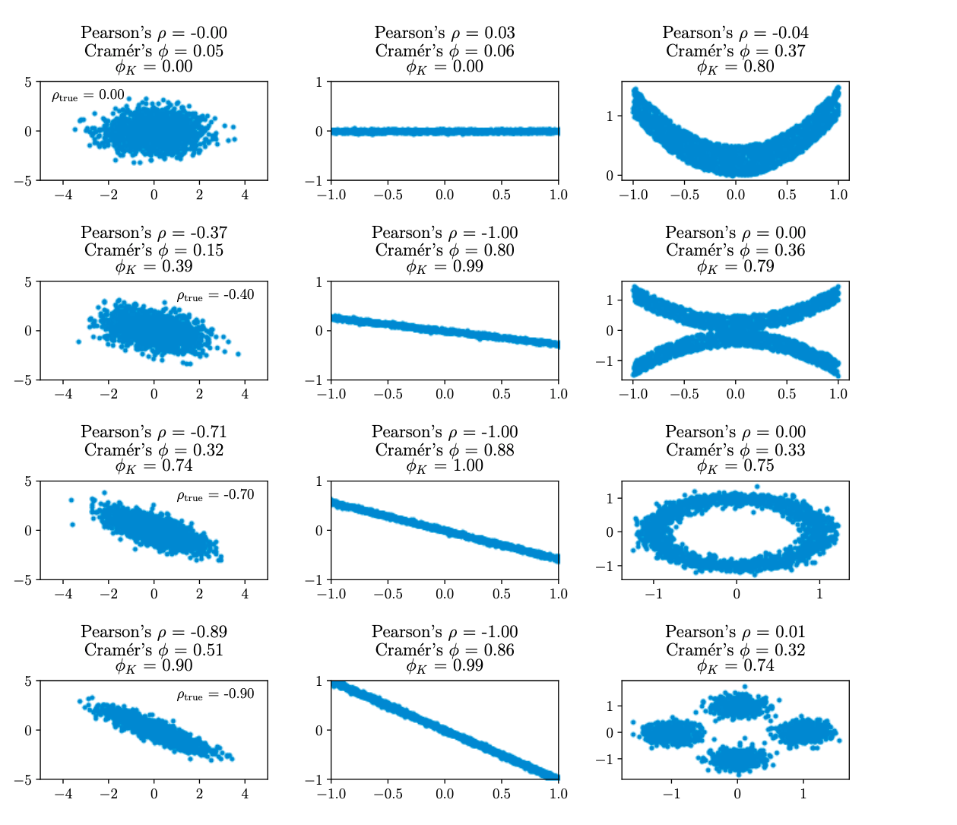

In [108]:
df_eda.phik_matrix()

interval columns not set, guessing: ['Product ID', 'Screen Size', 'Price ($)']


,Product ID,Brand,Type,Screen Size,Screen Specs,CPU,RAM,Hard Disk,GPU,Operating System,Weight,Price ($)
Product ID,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.031635,0.000000,0.000000
Brand,0.000000,1.000000,0.597209,0.603218,0.927760,0.932183,0.418201,0.778968,0.879613,0.832651,0.958597,0.548347
Type,0.000000,0.597209,1.000000,0.737250,0.789597,0.882506,0.536688,0.781918,0.922764,0.461405,0.917525,0.537503
Screen Size,0.000000,0.603218,0.737250,1.000000,0.848220,0.928761,0.567350,0.763425,0.895047,0.742318,0.977347,0.414711
Screen Specs,0.000000,0.927760,0.789597,0.848220,1.000000,0.975609,0.646719,0.843830,0.950989,0.896178,0.974360,0.741657
CPU,0.000000,0.932183,0.882506,0.928761,0.975609,1.000000,0.843644,0.969720,0.995509,0.946925,0.988415,0.880130
RAM,0.000000,0.418201,0.536688,0.567350,0.646719,0.843644,1.000000,0.804771,0.910983,0.306396,0.903041,0.702967
Hard Disk,0.000000,0.778968,0.781918,0.763425,0.843830,0.969720,0.804771,1.000000,0.933228,0.804659,0.966580,0.778609
GPU,0.000000,0.879613,0.922764,0.895047,0.950989,0.995509,0.910983,0.933228,1.000000,0.875883,0.990920,0.902956
Operating System,0.031635,0.832651,0.461405,0.742318,0.896178,0.946925,0.306396,0.804659,0.875883,1.000000,0.917641,0.289827


interval columns not set, guessing: ['Product ID', 'Screen Size', 'Price ($)']


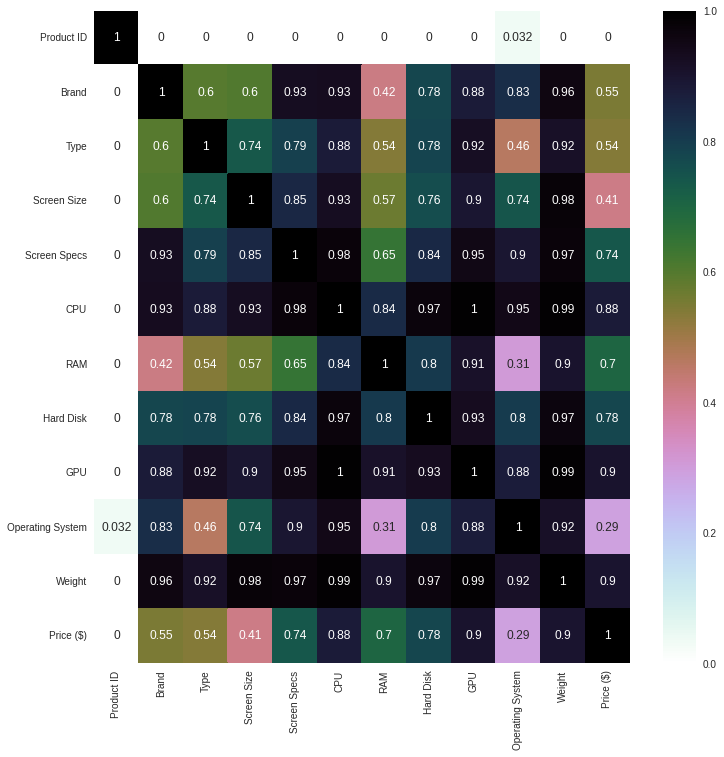

In [109]:
plt.figure(figsize=(12,12))
sns.heatmap(
    df_eda.phik_matrix(),
    cmap="cubehelix_r",
    annot = True)
plt.show()

Observations:

* Torque and Rotation Speed has the highest correlation compared to all other features at 0.60𝜙k and 0.46𝜙k respectively

* Ambient T (C) and Process T (C) is highly correlated to each other at 0.92𝜙k

* Torque (Nm) and Rotation Speed (rpm) are also highly correlated to each other at 0.93𝜙k

This is supported by the pairplot graphs. 

# Feature Processing 

add some description of what the fuck your gonnna do

## Correcting Weight Datatype

I'll choose to keep RAM as a nominial categorical feature at the start. We will can change it later on idk fix this up

In [10]:
# Remvoe kg from Weight
train_df['Weight'] = train_df["Weight"].str.replace("kg","")

#Remove GB from RAM
train_df['RAM'] = train_df["RAM"].str.replace("GB","")

# Change Datatype from Object --> float64
train_df['Weight'] = train_df['Weight'].astype('float64')
train_df['RAM'] = train_df["RAM"].astype('int64')


In [11]:
fig, ax = plt.subplots(figsize = (12, 7), tight_layout = True)

sns.histplot(train_df, x="Weight", element="step",bins=10)



## Extreme outlier removal

## Extracting Features, `X` and Target Variable, `y`

In [12]:
X = train_df.drop(columns=['Price ($)'])
y = train_df['Price ($)']

In [13]:
X

,Product ID,Brand,Type,Screen Size,Screen Specs,CPU,RAM,Hard Disk,GPU,Operating System,Weight
9909,9909,Dell,Ultrabook,12.5,Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics,Windows 10,1.36
893,893,Lenovo,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.32
13745,13745,Toshiba,Notebook,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 7,1.20
9240,9240,Acer,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8,1TB HDD,Nvidia GeForce MX130,Windows 10,2.20
13686,13686,Lenovo,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.32
...,...,...,...,...,...,...,...,...,...,...,...
905,905,LG,Ultrabook,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,16,512GB SSD,Intel HD Graphics 620,Windows 10,1.08
5192,5192,Asus,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4,256GB SSD,Intel HD Graphics 520,Linux,2.00
12172,12172,Dell,Gaming,15.6,Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,16,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,3.21
235,235,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,16,256GB SSD,AMD Radeon R7 M445,Linux,2.36


In [14]:
y

9909     3932.3408
893      4792.5360
13745    3901.0400
9240     1995.0800
13686    4804.1360
           ...    
905      5591.7360
5192     1116.7600
12172    5465.4640
235      2394.9360
13349     690.9200
Name: Price ($), Length: 12256, dtype: float64

## Remove usless feature

From our EDA, we noticed that `Product ID` has 0 Phik correlation score AND from meta data we know that its just a unique identifier for everysingle PC. Thus we can determin it will just introduce noise into our models, hence we shall remove

In [15]:
X = X.drop(['Product ID'], axis = 1) 

## Split dataset into Train and validation

We split our dataset into train and test set to better evaluate the performance of the model by examining its performance against the train set and test set.

This is to Check if Model if Overfitting, i.e Model performes will on trainig set but poorly on test set. Model is unalbe to generalize to new unseen data

We will yet again be following the 80:20 train,validation dataset split

In [47]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape,X_test.shape)

(9804, 10) (2452, 10)


We have 9.8k rows left for training and 2.4k rows for validation

## Encoding Categorical features

The categorical features is a MASSIVE headache to process.

There are a few ways we could go about encoding our features.



1.   One-Hot-Encoding

2.   Ordinal Encoding
3.   Frequency Encoding

From our EDA, we understand the following about our Categorical features: 


*   Features CPU, GPU have **high cardinility** ( 100+ unique values respectively )
*   All features are Nominal valued


---


### **Method 1**: one-hot-encode all categorical variables

Since categorical features are norminal it logical to perform one-hot-encoding. However, We will end up with data with extremely high dimensions which will pose problems ( curse of dimensionality ) 

Although we could further process the data by reducing dimensonality using PCA.While it is technically possible to use PCA on categorical variables ( after one-hot-encode ) we should not as variables don’t belong on a coordinate plane.

Other methods to include Recursive Feature Elimination to extract only 


### **Method 2**: Split High Cardinility features based on real life context groups followed by one-hot-encoding. The groups ill be spliting will be as follows


1. Extract CPU Vender, CPU Type and CPU Speed in Different Columns

2. Extract Memory type from Memory Column
3. Extract GPU Vender, GPU Type in Different Columns
4. Extract IPS and Touchscreen Feature form ScreenResolution Column

note: I'm personally am not a avid PC enthusist. Thus i will be using the grouping derived from PC context from [EVERYDAYCODINGS](https://www.kaggle.com/code/everydaycodings/laptop-price-prediction)

### **Method 3**: Frequency Encode + One-hot-Encoing

Frequency endoing refers to replacing the categories by their frequencies.

We will perform frequency encoing to features with high cardinility and one-hot-encode the rest of the categorical features

This way we won't have a high dimension space dataset while still retaining infomation about the categories


## Method 2 implementation



In [69]:
# Copy out the datasets 
X_2 = X.copy()
y_2 = y.copy()

### Extract CPU Vender, CPU Type and CPU Speed in Different Columns

In [70]:
X_2["CPU_Speed"] = X_2["CPU"].str.split(" ").apply(lambda x: x[-1]).str.replace("GHz", "")
X_2["CPU_Vender"] = X_2["CPU"].str.split(" ").apply(lambda x: x[0])
X_2["CPU_Type"] = X_2["CPU"].str.split(" ").apply(lambda x: x[1:4] if x[1] == "Celeron" and "Pentium" and "Xeon" else (x[1:3] if (x[1] == "Core" or x[0] == "AMD") else x[0]) )
X_2["CPU_Type"] = X_2["CPU_Type"].apply(lambda x: ' '.join(x))
X_2["CPU_Type"]
X_2.head()

,Brand,Type,Screen Size,Screen Specs,CPU,RAM,Hard Disk,GPU,Operating System,Weight,CPU_Speed,CPU_Vender,CPU_Type
9909,Dell,Ultrabook,12.5,Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics,Windows 10,1.36,2.5,Intel,Core i5
893,Lenovo,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.32,2.5,Intel,Core i5
13745,Toshiba,Notebook,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 7,1.20,2.3,Intel,Core i5
9240,Acer,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8,1TB HDD,Nvidia GeForce MX130,Windows 10,2.20,1.8,Intel,Core i7
13686,Lenovo,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.32,2.5,Intel,Core i5


### Extract Memory type from Memory Column


In [71]:
split_mem = X_2['Hard Disk'].str.split(' ', 1, expand=True)
X_2['Storage Type'] = split_mem[1]
X_2['Hard Disk'] = split_mem[0]
X_2["Hard Disk"].unique()
X_2.head()


,Brand,Type,Screen Size,Screen Specs,CPU,RAM,Hard Disk,GPU,Operating System,Weight,CPU_Speed,CPU_Vender,CPU_Type,Storage Type
9909,Dell,Ultrabook,12.5,Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB,Intel HD Graphics,Windows 10,1.36,2.5,Intel,Core i5,SSD
893,Lenovo,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB,Intel HD Graphics 620,Windows 10,1.32,2.5,Intel,Core i5,SSD
13745,Toshiba,Notebook,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8,256GB,Intel HD Graphics 520,Windows 7,1.20,2.3,Intel,Core i5,SSD
9240,Acer,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8,1TB,Nvidia GeForce MX130,Windows 10,2.20,1.8,Intel,Core i7,HDD
13686,Lenovo,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB,Intel HD Graphics 620,Windows 10,1.32,2.5,Intel,Core i5,SSD


In [72]:
df_mem= X_2['Hard Disk'].str.split('(\d+)',  expand=True)
X_2['Hard Disk'] = pd.to_numeric(df_mem[1])
X_2.rename(columns={'Hard Disk':'Hard Disk (GB or TB)'}, inplace=True)

def mem(x):
    if x == 1:
        return 1024
    elif x == 2:
        return 2048
X_2['Hard Disk (GB or TB)'] = X_2['Hard Disk (GB or TB)'].apply(lambda x: 1024 if x==1 else x)
X_2['Hard Disk (GB or TB)'] = X_2['Hard Disk (GB or TB)'].apply(lambda x: 2048 if x==2 else x)
X_2.rename(columns={'Hard Disk (GB or TB)':'Storage (GB)'}, inplace=True)
X_2.head()

,Brand,Type,Screen Size,Screen Specs,CPU,RAM,Storage (GB),GPU,Operating System,Weight,CPU_Speed,CPU_Vender,CPU_Type,Storage Type
9909,Dell,Ultrabook,12.5,Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8,256,Intel HD Graphics,Windows 10,1.36,2.5,Intel,Core i5,SSD
893,Lenovo,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256,Intel HD Graphics 620,Windows 10,1.32,2.5,Intel,Core i5,SSD
13745,Toshiba,Notebook,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8,256,Intel HD Graphics 520,Windows 7,1.20,2.3,Intel,Core i5,SSD
9240,Acer,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8,1024,Nvidia GeForce MX130,Windows 10,2.20,1.8,Intel,Core i7,HDD
13686,Lenovo,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256,Intel HD Graphics 620,Windows 10,1.32,2.5,Intel,Core i5,SSD


### Extract GPU Vender, GPU Type in Different Columns

In [73]:
GPU_distribution_list = X_2["GPU"].str.split(" ")
#X_2["GPU_Vender"] = X_2["GPU"].str.split(" ").apply(lambda x: x[0:2]  if x[0] == "Intel" else x[0]  if x[0] == "Intel Iris" else x[0])
X_2["GPU_Vender"] = X_2["GPU"].str.split(" ").apply(lambda x: x[0])
X_2["GPU_Type"] = X_2["GPU"].str.split(" ").apply(lambda x: x[1:])
X_2["GPU_Type"] = X_2["GPU_Type"].apply(lambda x: ' '.join(x))
X_2.head()

,Brand,Type,Screen Size,Screen Specs,CPU,RAM,Storage (GB),GPU,Operating System,Weight,CPU_Speed,CPU_Vender,CPU_Type,Storage Type,GPU_Vender,GPU_Type
9909,Dell,Ultrabook,12.5,Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8,256,Intel HD Graphics,Windows 10,1.36,2.5,Intel,Core i5,SSD,Intel,HD Graphics
893,Lenovo,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256,Intel HD Graphics 620,Windows 10,1.32,2.5,Intel,Core i5,SSD,Intel,HD Graphics 620
13745,Toshiba,Notebook,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8,256,Intel HD Graphics 520,Windows 7,1.20,2.3,Intel,Core i5,SSD,Intel,HD Graphics 520
9240,Acer,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8,1024,Nvidia GeForce MX130,Windows 10,2.20,1.8,Intel,Core i7,HDD,Nvidia,GeForce MX130
13686,Lenovo,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256,Intel HD Graphics 620,Windows 10,1.32,2.5,Intel,Core i5,SSD,Intel,HD Graphics 620


### Extract IPS and Touchscreen Feature form ScreenResolution Column

In [74]:
X_2['Touchscreen'] = X_2['Screen Specs'].apply(lambda x:1 if 'Touchscreen' in x else 0)
X_2['Ips'] = X_2['Screen Specs'].apply(lambda x:1 if 'IPS' in x else 0)

### Catorizing The Operating System

In [75]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

X_2['Operating System'] = X_2['Operating System'].apply(cat_os)

### Fetching Out The Usefull Columns the Leaving The Rest

In [76]:
X_2_clean = X_2.reindex(columns=["Brand", "Type", "Screen Size", "Touchscreen", "Ips", "CPU_Vender", "CPU_Type","RAM", "Storage (GB)", "Storage Type", "GPU_Vender", "GPU_Type", "Weight", "Operating System" ])

X_2_clean.head()

,Brand,Type,Screen Size,Touchscreen,Ips,CPU_Vender,CPU_Type,RAM,Storage (GB),Storage Type,GPU_Vender,GPU_Type,Weight,Operating System
9909,Dell,Ultrabook,12.5,1,0,Intel,Core i5,8,256,SSD,Intel,HD Graphics,1.36,Windows
893,Lenovo,Ultrabook,14.0,0,1,Intel,Core i5,8,256,SSD,Intel,HD Graphics 620,1.32,Windows
13745,Toshiba,Notebook,13.3,0,0,Intel,Core i5,8,256,SSD,Intel,HD Graphics 520,1.20,Windows
9240,Acer,Notebook,15.6,0,1,Intel,Core i7,8,1024,HDD,Nvidia,GeForce MX130,2.20,Windows
13686,Lenovo,Ultrabook,14.0,0,1,Intel,Core i5,8,256,SSD,Intel,HD Graphics 620,1.32,Windows


In [77]:
X_2_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12256 entries, 9909 to 13349
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             12256 non-null  object 
 1   Type              12256 non-null  object 
 2   Screen Size       12256 non-null  float64
 3   Touchscreen       12256 non-null  int64  
 4   Ips               12256 non-null  int64  
 5   CPU_Vender        12256 non-null  object 
 6   CPU_Type          12256 non-null  object 
 7   RAM               12256 non-null  int64  
 8   Storage (GB)      12256 non-null  int64  
 9   Storage Type      12256 non-null  object 
 10  GPU_Vender        12256 non-null  object 
 11  GPU_Type          12256 non-null  object 
 12  Weight            12256 non-null  float64
 13  Operating System  12256 non-null  object 
dtypes: float64(2), int64(4), object(8)
memory usage: 1.4+ MB


### Cardinality categorical features




In [78]:
X_2_clean[["Brand", "Type", "CPU_Vender", "CPU_Type", "Storage Type", "GPU_Vender", "GPU_Type", "Operating System" ]].nunique().sort_values()

CPU_Vender            3
Operating System      3
GPU_Vender            4
Type                  6
Storage Type         12
Brand                19
CPU_Type             32
GPU_Type            110
dtype: int64

### Remove GPU types where value count is less than 10

In [115]:
# Merge X and Y back together temperary to remove rows
Method2_df = pd.concat([X_2_clean, y_2],axis=1)


Method2_df = Method2_df[Method2_df.groupby('GPU_Type').GPU_Type.transform('count')>10].copy() 


X_2_clean = Method2_df.drop(columns=['Price ($)'])
y_2 = Method2_df['Price ($)']

### Phik correlation matric on processed dataset 

In [141]:
Method2_df.phik_matrix()

interval columns not set, guessing: ['Screen Size', 'Touchscreen', 'Ips', 'RAM', 'Storage (GB)', 'Weight', 'Price ($)']


,Brand,Type,Screen Size,Touchscreen,Ips,CPU_Vender,CPU_Type,RAM,Storage (GB),Storage Type,GPU_Vender,GPU_Type,Weight,Operating System,Price ($)
Brand,1.000000,0.595748,0.584020,0.322365,0.399807,0.477572,0.598713,0.422470,0.352382,0.522817,0.568607,0.866830,0.574854,0.875474,0.549479
Type,0.595748,1.000000,0.739285,0.942196,0.445840,0.297533,0.596266,0.444243,0.293563,0.758902,0.604082,0.916492,0.663306,0.480935,0.543358
Screen Size,0.584020,0.739285,1.000000,0.425163,0.232389,0.318072,0.603166,0.396803,0.382434,0.599272,0.543971,0.874733,0.754986,0.481294,0.412827
Touchscreen,0.322365,0.942196,0.425163,1.000000,0.241250,0.069487,0.228461,0.142406,0.081637,0.354117,0.414862,0.522918,0.483462,0.052509,0.315684
Ips,0.399807,0.445840,0.232389,0.241250,1.000000,0.060802,0.327609,0.222291,0.109478,0.325003,0.279726,0.517948,0.392750,0.091603,0.352828
CPU_Vender,0.477572,0.297533,0.318072,0.069487,0.060802,1.000000,1.000000,0.289711,0.129713,0.283204,0.759728,0.987244,0.227718,0.231677,0.278317
CPU_Type,0.598713,0.596266,0.603166,0.228461,0.327609,1.000000,1.000000,0.715008,0.617432,0.676749,0.899160,0.973841,0.570481,0.498849,0.624837
RAM,0.422470,0.444243,0.396803,0.142406,0.222291,0.289711,0.715008,1.000000,0.396957,0.526313,0.396053,0.807375,0.501007,0.248748,0.679479
Storage (GB),0.352382,0.293563,0.382434,0.081637,0.109478,0.129713,0.617432,0.396957,1.000000,0.705378,0.174405,0.697101,0.428619,0.185940,0.548245
Storage Type,0.522817,0.758902,0.599272,0.354117,0.325003,0.283204,0.676749,0.526313,0.705378,1.000000,0.656704,0.848253,0.581382,0.475521,0.508223


interval columns not set, guessing: ['Screen Size', 'Touchscreen', 'Ips', 'RAM', 'Storage (GB)', 'Weight', 'Price ($)']


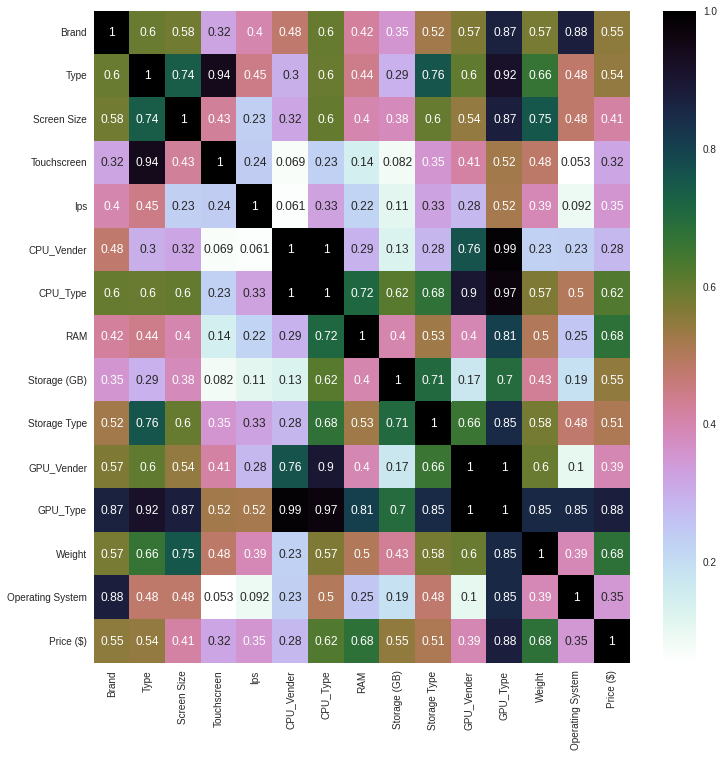

In [142]:
# plot heatmap
plt.figure(figsize=(12,12))
sns.heatmap(
    Method2_df.phik_matrix(),
    cmap="cubehelix_r",
    annot = True)
plt.show()

### Train Test Split

We split our dataset into train and test set to better evaluate the performance of the model by examining its performance against the train set and test set.

This is to Check if Model if Overfitting, i.e Model performes will on trainig set but poorly on test set. Model is unalbe to generalize to new unseen data

In [136]:
X_train_2,X_test_2,y_train_2,y_test_2= train_test_split(X_2_clean,y_2,test_size=0.2,random_state=40)

In [129]:
# the _2 beside X_train refers to Dataset processed by method 2
print(X_train_2.shape,X_test_2.shape)

(9561, 14) (2391, 14)


### One Hot Encoding

For Now we shall assume all features are norminally valued

We will look into other forms of encoding later on in this notebook or smt

Perfrom Dummy encoding for all categorical variables

In [137]:
# categorical_col = ["Brand", "Type", "CPU_Vender", "CPU_Type", "Storage Type", "GPU_Vender", "GPU_Type", "Operating System" ]

# X_train_2_OHE = pd.get_dummies(X_train_2[categorical_col], drop_first= False, prefix_sep="-") #onehot encode for categorical features

# X_test_2_OHE = pd.get_dummies(X_test_2[categorical_col], drop_first= False, prefix_sep="-") #onehot encode for categorical features



categorical_col = ["Brand", "Type", "CPU_Vender", "CPU_Type", "Storage Type", "GPU_Vender", "GPU_Type", "Operating System" ]

X_train_2_OHE = X_train_2.join(pd.get_dummies(X_train_2[categorical_col], drop_first= False, prefix_sep="-")) #onehot encode for categorical features

X_test_2_OHE = X_test_2.join(pd.get_dummies(X_test_2[categorical_col], drop_first= False, prefix_sep="-")) #onehot encode for categorical features

X_train_2_OHE = X_train_2_OHE.drop(columns=categorical_col, axis = 1) 
X_test_2_OHE = X_test_2_OHE.drop(columns=categorical_col,axis= 1)


In [138]:
display(X_train_2_OHE)
display(X_test_2_OHE)

,Screen Size,Touchscreen,Ips,RAM,Storage (GB),Weight,Brand-Acer,Brand-Apple,Brand-Asus,Brand-Chuwi,...,GPU_Type-Radeon R7 M440,GPU_Type-Radeon R7 M445,GPU_Type-Radeon R7 M460,GPU_Type-Radeon RX 540,GPU_Type-Radeon RX 550,GPU_Type-Radeon RX 580,GPU_Type-UHD Graphics 620,Operating System-Mac,Operating System-Others/No OS/Linux,Operating System-Windows
3154,15.6,0.0,0.0,4.0,128.0,2.20,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5036,15.6,0.0,0.0,8.0,256.0,1.91,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6345,17.3,0.0,1.0,16.0,256.0,2.43,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
253,13.9,1.0,1.0,8.0,512.0,1.37,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
14395,14.0,0.0,0.0,4.0,32.0,1.50,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14784,15.6,1.0,1.0,16.0,128.0,2.72,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6972,17.3,0.0,0.0,8.0,128.0,3.00,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
9741,14.0,0.0,0.0,16.0,512.0,1.95,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
14443,15.6,0.0,0.0,8.0,256.0,2.02,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


,Screen Size,Touchscreen,Ips,RAM,Storage (GB),Weight,Brand-Acer,Brand-Apple,Brand-Asus,Brand-Chuwi,...,GPU_Type-Radeon R7 M440,GPU_Type-Radeon R7 M445,GPU_Type-Radeon R7 M460,GPU_Type-Radeon RX 540,GPU_Type-Radeon RX 550,GPU_Type-Radeon RX 580,GPU_Type-UHD Graphics 620,Operating System-Mac,Operating System-Others/No OS/Linux,Operating System-Windows
13339,14.0,0.0,0.0,4.0,500.0,1.87,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9364,17.3,0.0,0.0,16.0,256.0,2.90,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2022,17.3,0.0,0.0,8.0,256.0,2.63,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1676,17.3,0.0,0.0,4.0,128.0,2.60,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11871,15.6,0.0,0.0,4.0,128.0,1.85,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12894,15.6,0.0,0.0,4.0,500.0,2.10,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13171,14.0,0.0,0.0,4.0,32.0,1.50,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
8213,17.3,0.0,0.0,8.0,1024.0,2.65,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12828,14.0,0.0,0.0,4.0,64.0,1.44,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### Feature Scaling ( Method 2 )

In [139]:

# Initialize StandardScaler class
scaler = StandardScaler()

num_col = ['Screen Size', 'RAM', 'Weight', 'Storage (GB)']

# Fit and transform training and test sets to standardize numercial values 
X_train_2_OHE[num_col] = scaler.fit_transform(X_train_2_OHE[num_col] )
X_test_2_OHE[num_col] = scaler.fit_transform(X_test_2_OHE[num_col] )

### End ###
X_train_2_OHE

,Screen Size,Touchscreen,Ips,RAM,Storage (GB),Weight,Brand-Acer,Brand-Apple,Brand-Asus,Brand-Chuwi,...,GPU_Type-Radeon R7 M440,GPU_Type-Radeon R7 M445,GPU_Type-Radeon R7 M460,GPU_Type-Radeon RX 540,GPU_Type-Radeon RX 550,GPU_Type-Radeon RX 580,GPU_Type-UHD Graphics 620,Operating System-Mac,Operating System-Others/No OS/Linux,Operating System-Windows
3154,0.433353,0.0,0.0,-0.900451,-0.859605,0.256850,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5036,0.433353,0.0,0.0,-0.063996,-0.509937,-0.177007,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6345,1.614708,0.0,1.0,1.608913,-0.509937,0.600943,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
253,-0.748001,1.0,1.0,-0.063996,0.189399,-0.984878,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
14395,-0.678510,0.0,0.0,-0.900451,-1.121857,-0.790390,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14784,0.433353,1.0,1.0,1.608913,-0.859605,1.034800,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6972,1.614708,0.0,0.0,-0.063996,-0.859605,1.453696,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
9741,-0.678510,0.0,0.0,1.608913,0.189399,-0.117164,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
14443,0.433353,0.0,0.0,-0.063996,-0.509937,-0.012440,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Conclusions

After One-hot-encoding all the categorical variables, we are left with 156 features. 

Even though this is half the number of features as compared to method 1 (322 features), the dimension space is still relatively large.

Thus we will look into reducing feature space in the Model Improvemnt using method like Feature selection

## Method 3 implementation:
Count/Frequency Encoder for High cardinality + One-hot-encoding for the rest


In [17]:
!pip install category_encoders 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 3.6 MB/s 


### Count Encoder

In [35]:
import category_encoders as ce 

#I'll pretend that you've already split your data into train/test

#your categorical features
cat_features = ['Screen Specs', 'CPU', 'Hard Disk', 'GPU']

#count encoder 
count_encoder = ce.CountEncoder(cols=cat_features)
count_encoder.fit(X_train[cat_features])

X_train = X_train.join(count_encoder.transform(X_train[cat_features]).add_suffix('_count'))
X_test = X_test.join(count_encoder.transform(X_test[cat_features]).add_suffix('_count'))

# Drop columns ProductID 
X_train = X_train.drop(columns=cat_features, axis = 1) 
X_test = X_test.drop(columns=cat_features,axis= 1)

display(X_train)

,Brand,Type,Screen Size,RAM,Operating System,Weight,Screen Specs_count,CPU_count,Hard Disk_count,GPU_count
6962,MSI,Gaming,15.6,16,Windows 10,1.80,61,1116,77,368
3789,Dell,Notebook,15.6,6,Windows 10,2.30,2107,270,1655,2096
285,Acer,Notebook,15.6,12,Windows 10,2.15,401,1002,1655,2096
137,Asus,Gaming,17.3,8,Windows 10,3.00,3797,247,701,509
10991,Dell,Netbook,11.6,4,Windows 10,1.63,2107,105,584,90
...,...,...,...,...,...,...,...,...,...,...
12578,HP,Notebook,13.3,4,Chrome OS,1.29,23,7,285,110
3759,Dell,Notebook,15.6,8,Windows 10,2.30,121,270,1655,2096
9515,Dell,Gaming,17.3,16,Windows 10,4.42,1756,1116,543,228
10209,Dell,Notebook,14.0,4,Windows 10,1.60,2107,1433,981,2096


### One hot oncoding the rest

In [36]:
categorical_col = ['Brand', 'Type', 'Operating System']

onehot_encode_train = X_train.join(pd.get_dummies(X_train[categorical_col], drop_first= False, prefix_sep="-")) #onehot encode for categorical features

onehot_encode_test = X_test.join(pd.get_dummies(X_test[categorical_col], drop_first= False, prefix_sep="-")) #onehot encode for categorical features

onehot_encode_train = onehot_encode_train.drop(columns=categorical_col, axis = 1) 
onehot_encode_test = onehot_encode_test.drop(columns=categorical_col,axis= 1)


display(onehot_encode_train)
display(onehot_encode_test)

,Screen Size,RAM,Weight,Screen Specs_count,CPU_count,Hard Disk_count,GPU_count,Brand-Acer,Brand-Apple,Brand-Asus,...,Type-Workstation,Operating System-Android,Operating System-Chrome OS,Operating System-Linux,Operating System-Mac OS X,Operating System-No OS,Operating System-Windows 10,Operating System-Windows 10 S,Operating System-Windows 7,Operating System-macOS
6962,15.6,16,1.80,61,1116,77,368,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3789,15.6,6,2.30,2107,270,1655,2096,0,0,0,...,0,0,0,0,0,0,1,0,0,0
285,15.6,12,2.15,401,1002,1655,2096,1,0,0,...,0,0,0,0,0,0,1,0,0,0
137,17.3,8,3.00,3797,247,701,509,0,0,1,...,0,0,0,0,0,0,1,0,0,0
10991,11.6,4,1.63,2107,105,584,90,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12578,13.3,4,1.29,23,7,285,110,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3759,15.6,8,2.30,121,270,1655,2096,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9515,17.3,16,4.42,1756,1116,543,228,0,0,0,...,0,0,0,0,0,0,1,0,0,0
10209,14.0,4,1.60,2107,1433,981,2096,0,0,0,...,0,0,0,0,0,0,1,0,0,0


,Screen Size,RAM,Weight,Screen Specs_count,CPU_count,Hard Disk_count,GPU_count,Brand-Acer,Brand-Apple,Brand-Asus,...,Type-Ultrabook,Type-Workstation,Operating System-Chrome OS,Operating System-Linux,Operating System-Mac OS X,Operating System-No OS,Operating System-Windows 10,Operating System-Windows 10 S,Operating System-Windows 7,Operating System-macOS
12482,15.6,4,1.90,2107,226,584,294,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6135,15.6,4,2.18,2107,270,584,2096,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9044,12.0,8,0.92,45,6,877,113,0,1,0,...,1,0,0,0,0,0,0,0,0,1
13025,15.6,16,3.20,1756,1116,543,368,0,0,0,...,0,0,0,0,0,0,1,0,0,0
14387,15.6,12,2.26,364,1002,26,34,0,0,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10620,15.6,16,2.30,97,98,877,307,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3165,13.3,8,1.37,401,1002,3105,2096,0,0,0,...,0,0,0,0,0,0,1,0,0,0
12605,13.3,8,1.23,3797,14,3105,55,0,0,0,...,1,0,0,0,0,0,1,0,0,0
9468,13.3,8,1.44,3797,1433,3105,2096,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [20]:
onehot_encode_train.columns

Index(['Screen Size', 'RAM', 'Weight', 'Screen Specs_count', 'CPU_count',
       'Hard Disk_count', 'GPU_count', 'Brand-Acer', 'Brand-Apple',
       'Brand-Asus', 'Brand-Chuwi', 'Brand-Dell', 'Brand-Fujitsu',
       'Brand-Google', 'Brand-HP', 'Brand-Huawei', 'Brand-LG', 'Brand-Lenovo',
       'Brand-MSI', 'Brand-Mediacom', 'Brand-Microsoft', 'Brand-Razer',
       'Brand-Samsung', 'Brand-Toshiba', 'Brand-Vero', 'Brand-Xiaomi',
       'Type-2 in 1 Convertible', 'Type-Gaming', 'Type-Netbook',
       'Type-Notebook', 'Type-Ultrabook', 'Type-Workstation',
       'Operating System-Android', 'Operating System-Chrome OS',
       'Operating System-Linux', 'Operating System-Mac OS X',
       'Operating System-No OS', 'Operating System-Windows 10',
       'Operating System-Windows 10 S', 'Operating System-Windows 7',
       'Operating System-macOS'],
      dtype='object')

In [21]:
onehot_encode_test.columns

Index(['Screen Size', 'RAM', 'Weight', 'Screen Specs_count', 'CPU_count',
       'Hard Disk_count', 'GPU_count', 'Brand-Acer', 'Brand-Apple',
       'Brand-Asus', 'Brand-Chuwi', 'Brand-Dell', 'Brand-Fujitsu',
       'Brand-Google', 'Brand-HP', 'Brand-Huawei', 'Brand-LG', 'Brand-Lenovo',
       'Brand-MSI', 'Brand-Mediacom', 'Brand-Microsoft', 'Brand-Razer',
       'Brand-Samsung', 'Brand-Toshiba', 'Brand-Vero', 'Brand-Xiaomi',
       'Type-2 in 1 Convertible', 'Type-Gaming', 'Type-Netbook',
       'Type-Notebook', 'Type-Ultrabook', 'Type-Workstation',
       'Operating System-Chrome OS', 'Operating System-Linux',
       'Operating System-Mac OS X', 'Operating System-No OS',
       'Operating System-Windows 10', 'Operating System-Windows 10 S',
       'Operating System-Windows 7', 'Operating System-macOS'],
      dtype='object')

In [37]:
onehot_encode_train = onehot_encode_train.drop('Operating System-Android',axis=1)

### Feature Scaling

We will be normalzing all features that were not one-hot-encoded as there is no need to "normalize" what is already categorical.

In [38]:
# # demostration of MinMaxScaler
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X_train_scale = pd.DataFrame(scaler.fit_transform(X_train), columns=X_col)
# # plotting out boxplots
# with plt.style.context('ggplot'):
#     fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 9), tight_layout=True)
#     X_train.plot.box(vert=True, title='Before Normalisation', ax=ax1)
#     X_train_scale.plot.box(vert=True, title='After Normalisation', ax=ax2)
#     plt.show()


# Save an unscaled copy for comparism
X_train_unscaled = onehot_encode_train.copy()
X_test_unscaled = onehot_encode_test.copy()
# Initialize StandardScaler class
scaler = StandardScaler()

num_col = ['Screen Size', 'RAM', 'Weight', 'Screen Specs_count', 'CPU_count','Hard Disk_count', 'GPU_count']

# Fit and transform training and test sets to standardize numercial values 
onehot_encode_train[num_col] = scaler.fit_transform(onehot_encode_train[num_col] )
onehot_encode_test[num_col] = scaler.fit_transform(onehot_encode_test[num_col] )

### End ###
onehot_encode_train



,Screen Size,RAM,Weight,Screen Specs_count,CPU_count,Hard Disk_count,GPU_count,Brand-Acer,Brand-Apple,Brand-Asus,...,Type-Ultrabook,Type-Workstation,Operating System-Chrome OS,Operating System-Linux,Operating System-Mac OS X,Operating System-No OS,Operating System-Windows 10,Operating System-Windows 10 S,Operating System-Windows 7,Operating System-macOS
6962,0.415576,1.481814,-0.353845,-1.603299,1.025619,-1.316253,-0.522718,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3789,0.415576,-0.478317,0.388397,-0.123801,-0.688694,0.074107,1.621626,0,0,0,...,0,0,0,0,0,0,1,0,0,0
285,0.415576,0.697762,0.165724,-1.357439,0.794612,0.074107,1.621626,1,0,0,...,0,0,0,0,0,0,1,0,0,0
137,1.602605,-0.086291,1.427535,1.098267,-0.735301,-0.766453,-0.347745,0,0,1,...,0,0,0,0,0,0,1,0,0,0
10991,-2.377435,-0.870343,-0.606207,-0.123801,-1.023046,-0.869540,-0.867699,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12578,-1.190405,-0.870343,-1.110932,-1.630778,-1.221631,-1.132986,-0.842880,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3759,0.415576,-0.086291,0.388397,-1.559912,-0.688694,0.074107,1.621626,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9515,1.602605,1.481814,3.535502,-0.377615,1.025619,-0.905665,-0.696449,0,0,0,...,0,0,0,0,0,0,1,0,0,0
10209,-0.701628,-0.870343,-0.650742,-0.123801,1.667979,-0.519748,1.621626,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [96]:
MinMax_train = X_train_unscaled.copy()
MinMax_test = X_test_unscaled.copy()
# Use MinMaxScaler() instead of StandardScalar()
# Initialize 
min_max_scaler = MinMaxScaler()
num_col = ['Screen Size', 'RAM', 'Weight', 'Screen Specs_count', 'CPU_count','Hard Disk_count', 'GPU_count']

# Fit and transform training and test sets to standardize numercial values 
MinMax_train[num_col] = min_max_scaler.fit_transform(X_train_unscaled[num_col] )
MinMax_test[num_col] = min_max_scaler.fit_transform(X_test_unscaled[num_col] )
MinMax_train

,Screen Size,RAM,Weight,Screen Specs_count,CPU_count,Hard Disk_count,GPU_count,Brand-Acer,Brand-Apple,Brand-Asus,...,Type-Ultrabook,Type-Workstation,Operating System-Chrome OS,Operating System-Linux,Operating System-Mac OS X,Operating System-No OS,Operating System-Windows 10,Operating System-Windows 10 S,Operating System-Windows 7,Operating System-macOS
6962,0.662651,0.225806,0.276808,0.014508,0.778322,0.023226,0.174391,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3789,0.662651,0.064516,0.401496,0.554207,0.186713,0.532258,1.000000,0,0,0,...,0,0,0,0,0,0,1,0,0,0
285,0.662651,0.161290,0.364090,0.104194,0.698601,0.532258,1.000000,1,0,0,...,0,0,0,0,0,0,1,0,0,0
137,0.867470,0.096774,0.576060,1.000000,0.170629,0.224516,0.241758,0,0,1,...,0,0,0,0,0,0,1,0,0,0
10991,0.180723,0.032258,0.234414,0.554207,0.071329,0.186774,0.041567,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12578,0.385542,0.032258,0.149626,0.004484,0.002797,0.090323,0.051123,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3759,0.662651,0.096774,0.401496,0.030335,0.186713,0.532258,1.000000,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9515,0.867470,0.225806,0.930175,0.461620,0.778322,0.173548,0.107501,0,0,0,...,0,0,0,0,0,0,1,0,0,0
10209,0.469880,0.032258,0.226933,0.554207,1.000000,0.314839,1.000000,0,0,0,...,0,0,0,0,0,0,1,0,0,0


# Model Selection

We will now try out different models from different family of models and select the best candidate models. 

1. Linear Models ( Linear Regression , BayesianRidge , SGDRegressor )

2. Distance Based models (KNeighborsRegressor)

3. DecisionTree ( DecisionTreeRegressor )

4. Ensemble Tree Models (RandomForest, GradientBoosting)

5. SVMs with different (linear, rbf, poly, sigmoid) kernels

This will be done on the training set using cross validation.

## Quick evalutation function

Bascially, instead of performing cv , test on each model seperately. We will make use of this "quick_evalutaion" function to standardize the reporting of all our model performance.

We will be evaluting which model to select based on the following This function will 


*   Cross validate using KFold each model on **training set**, and keeps a history of the model performance.
*  Scoring on **Validation set**
* Plot learning curve of each model 



In [44]:

## Quick Eval function to fit and score all models at once
def quick_evalutaion(models, X_train, X_test, y_train, y_test, metrics=["neg_mean_squared_error","neg_mean_absolute_error","neg_mean_absolute_percentage_error"],curve = True, cv = KFold(n_splits=5,shuffle=True,random_state=1)):
    hist = {}
    
    for idx, model in (enumerate(models)):
        try:
            clf = model(random_state=42) # Setting random_state for certain model
        except:
            clf = model()
        clf.fit(X_train, y_train)
        test_prediction = clf.predict(X_test) # Testing on validation dataset

        MAPE_test = mean_absolute_percentage_error(y_test, test_prediction)
        MAE_test = mean_absolute_error(y_test, test_prediction)
        MSE_test = mean_squared_error(y_test,test_prediction)

        # 5-Fold CV
        cv_hist = cross_validate(clf, X_train, y_train, scoring=metrics,verbose=1)

        # Record down the performance
        hist[model.__name__] = dict(
            # train_acc = acc_train,
            fit_time = cv_hist['fit_time'].mean(),
            score_time = cv_hist['score_time'].mean(),
            cv_MAE = cv_hist['test_neg_mean_absolute_error'].mean(),
            MAE_test_score = MAE_test,
            cv_MAPE = cv_hist['test_neg_mean_absolute_percentage_error'].mean(),
            MAPE_test_score = MAPE_test,
            cv_MSE = cv_hist['test_neg_mean_squared_error'].mean(),
            MSE_test_score = MSE_test
        )

        # Plotting the learning Curve of each Model using: neg_mean_squared_log_error
        if curve:
          fig, ax = plt.subplots(figsize=(10, 8))
          train_sizes = np.linspace(.1, 1.0, 10)
          train_sizes, train_scores, test_scores = learning_curve(clf, X_train, y_train, cv = cv, n_jobs = -1, train_sizes = train_sizes, scoring="neg_mean_absolute_error")
          scores = pd.DataFrame({
          "Train Sizes" : np.tile(train_sizes, train_scores.shape[1]),
          "Train Scores" : train_scores.flatten(),
          "Test Scores" : test_scores.flatten()
          }).melt(value_vars=["Train Scores", "Test Scores"], var_name="Score Type", value_name="Scores", id_vars=["Train Sizes"])
          # print(f"THis is train_sizes:\n{train_sizes}\n This is train_scores:\n{train_scores}\n This is test_scores:{test_scores}")
          sns.lineplot(data=scores, x="Train Sizes", y="Scores", hue="Score Type", ax = ax ,palette=['#3DD5E2', '#A045B5'])
          ax.set_title(f"Learning Curve of {model}")
          ax.set_ylabel("neg_mean_absolute_error")
          ax.set_xlabel("Train Sizes")
          plt.show()
        
    # plt.tight_layout()
    # display(pd.DataFrame(hist).T)

    results = pd.DataFrame(hist).T
    return results
    # plt.show()

## Method 2 quick model evaluation/selection

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


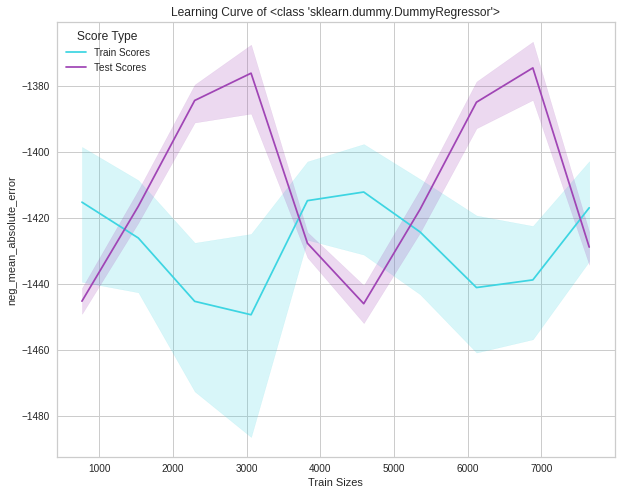

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.9s finished


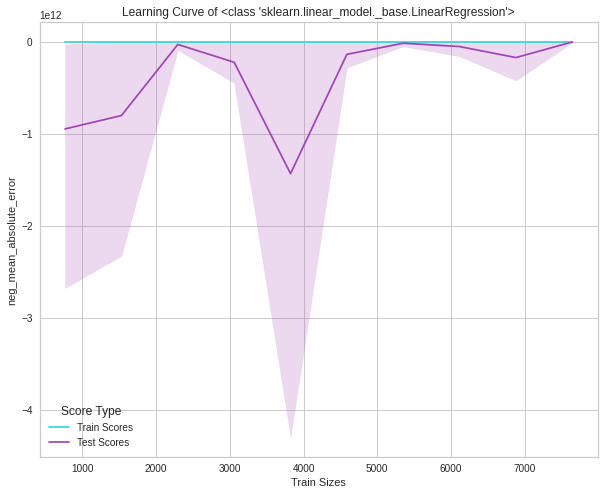

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.7s finished


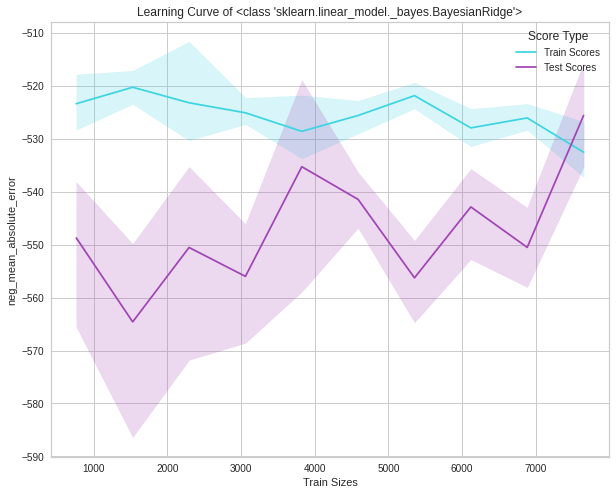

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s finished


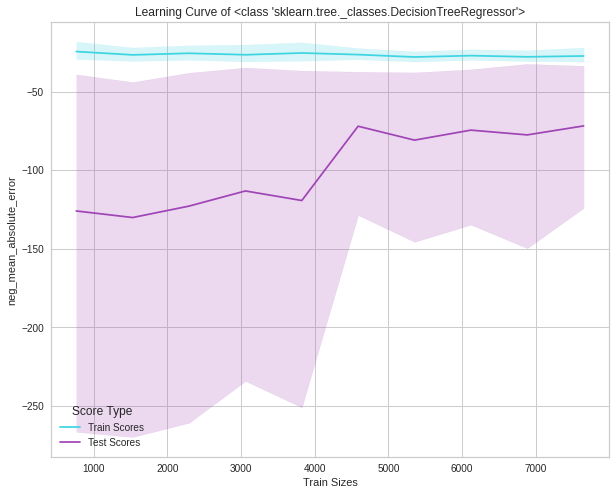

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished


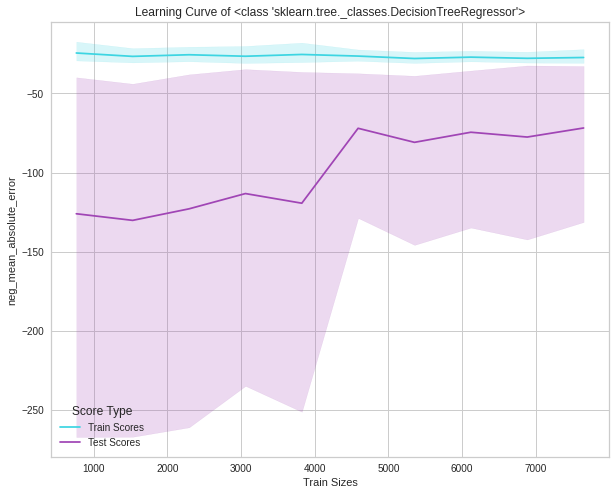

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   17.7s finished


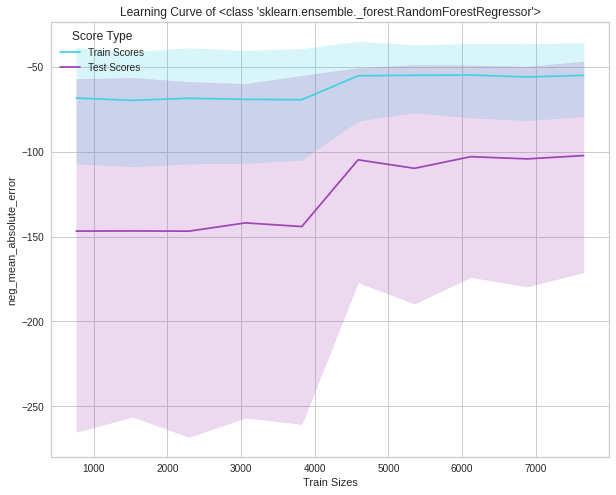

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   21.4s finished


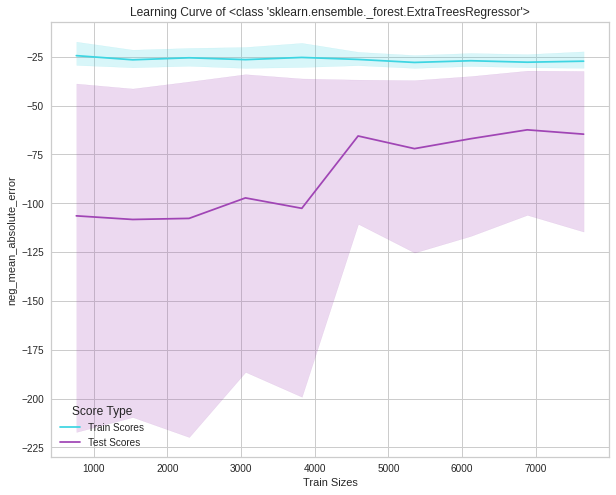

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    8.1s finished


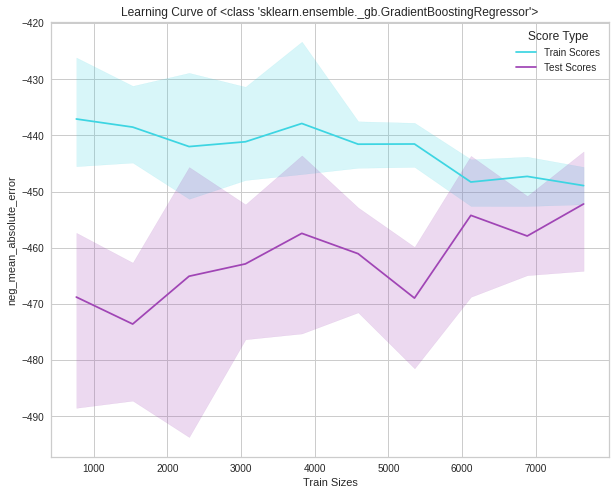

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    7.0s finished


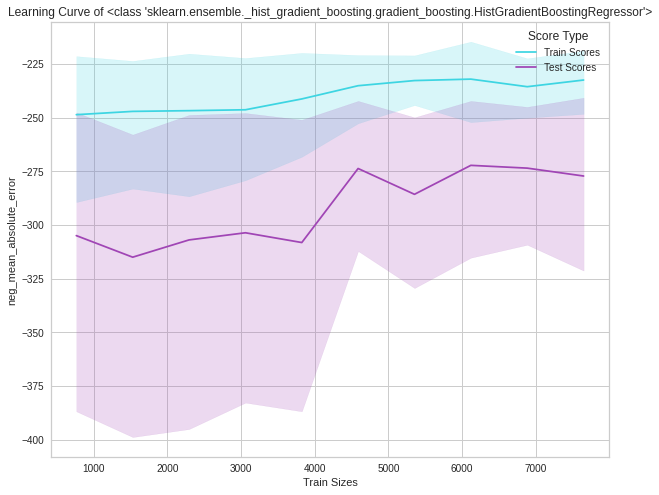

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.9s finished
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



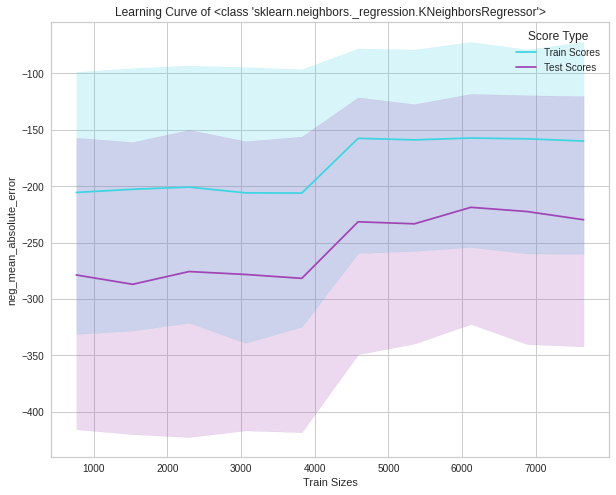

,fit_time,score_time,cv_MAE,MAE_test_score,cv_MAPE,MAPE_test_score,cv_MSE,MSE_test_score
DummyRegressor,0.012689,0.001093,-1401.582539,1433.038544,-0.712372,0.708108,-3.314905e+06,3.607604e+06
BayesianRidge,0.130146,0.006611,-533.208994,538.878808,-0.211143,0.207031,-5.430868e+05,5.584676e+05
LinearRegression,0.163341,0.009714,-532.323535,538.535588,-0.211038,0.206757,-5.431484e+05,5.597880e+05
GradientBoostingRegressor,1.617326,0.008739,-449.327215,458.023683,-0.176616,0.176319,-3.746642e+05,3.874060e+05
DecisionTreeRegressor,0.062951,0.005477,-32.348349,413.530342,-0.011376,0.117547,-1.396345e+04,1.612307e+06
HistGradientBoostingRegressor,1.379355,0.016415,-236.683014,290.783661,-0.089118,0.107015,-1.123693e+05,1.721866e+05
RandomForestRegressor,3.484714,0.058740,-38.116978,252.457666,-0.013208,0.072264,-1.479048e+04,5.795514e+05
ExtraTreesRegressor,4.221316,0.059551,-32.394002,76.896497,-0.011417,0.024233,-1.398590e+04,2.158772e+04
KNeighborsRegressor,0.014398,0.373668,-72.356492,38.705877,-0.024780,0.014407,-3.482381e+04,1.541381e+04


In [140]:
# ExtraTreesRegressor,GradientBoostingRegressor,HistGradientBoostingRegressor,LinearSVR
models = [DummyRegressor,LinearRegression,BayesianRidge,DecisionTreeRegressor,DecisionTreeRegressor,RandomForestRegressor,ExtraTreesRegressor,GradientBoostingRegressor,HistGradientBoostingRegressor,KNeighborsRegressor]

eval_2 = quick_evalutaion(models, X_train_2_OHE, X_test_2_OHE, y_train_2, y_test_2,curve=True)
eval_2.sort_values("MAE_test_score", ascending=False)

## Method 3 quick model evaluation/selection



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


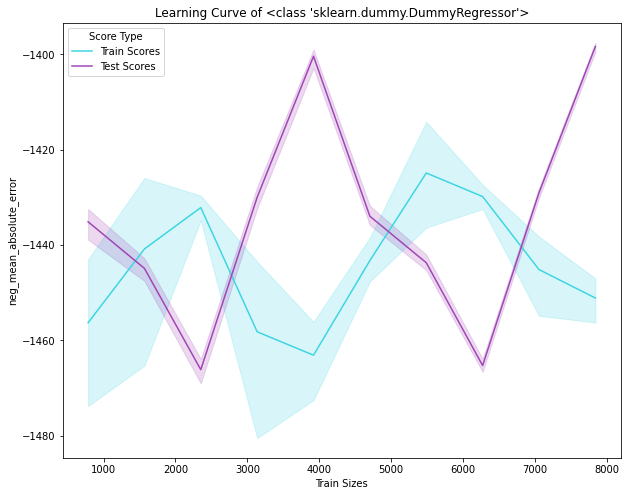

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


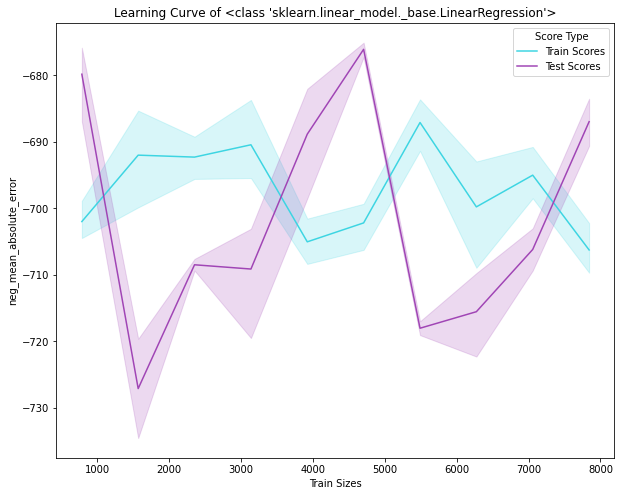

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s finished


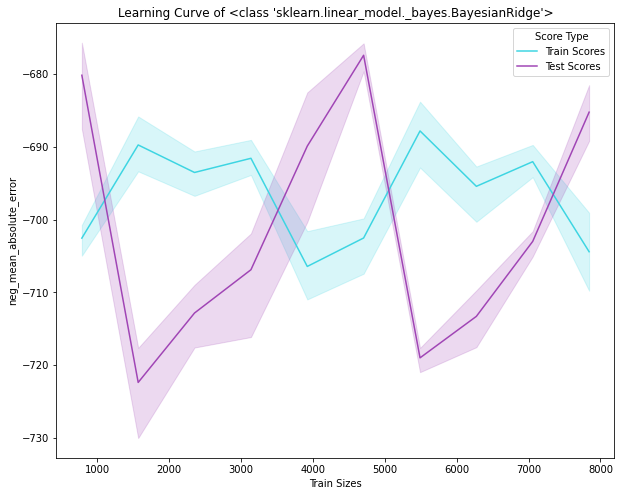

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s finished


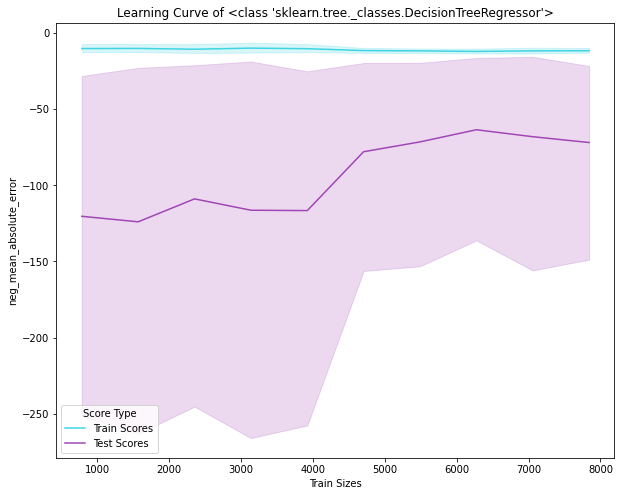

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s finished


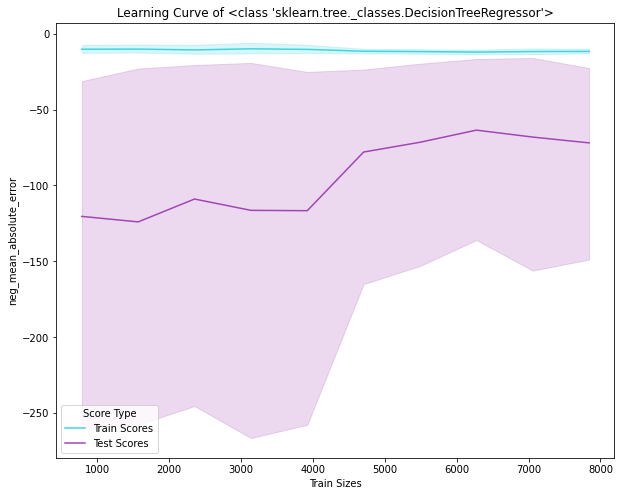

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    9.9s finished


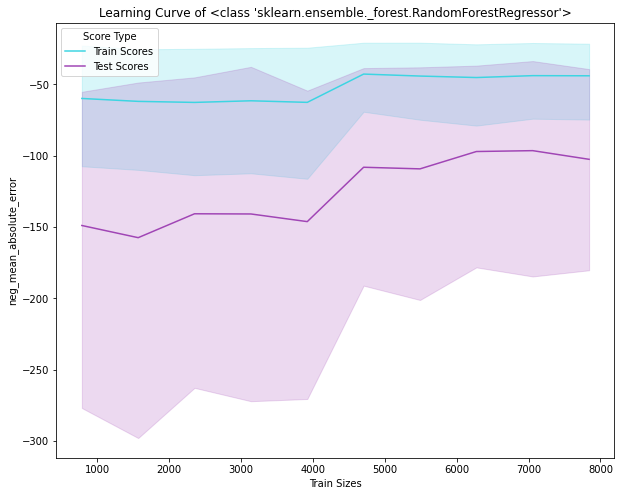

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    9.5s finished


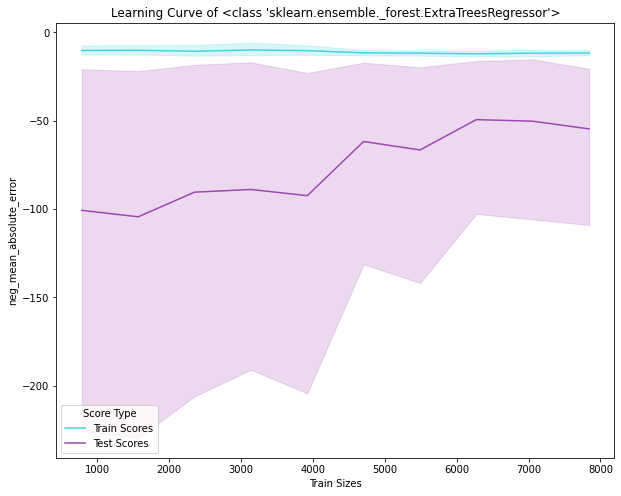

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.4s finished


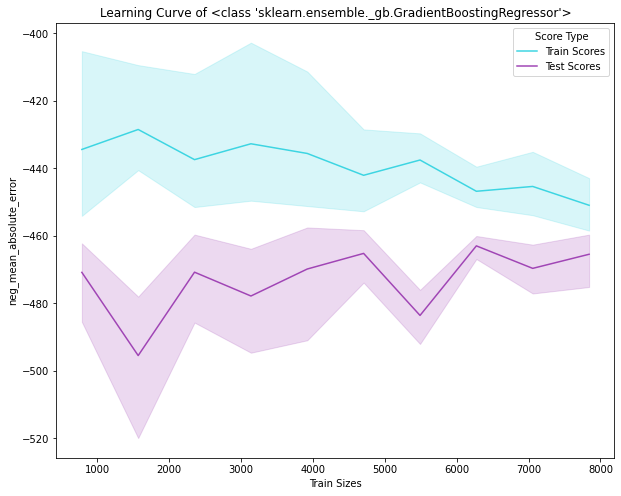

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.7s finished


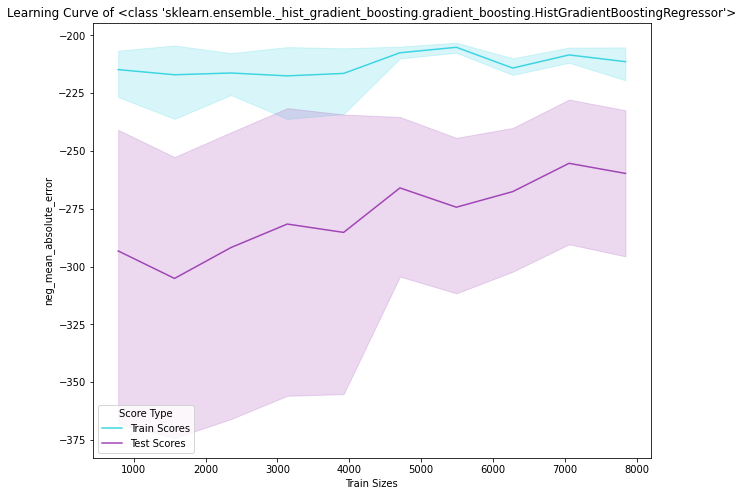

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.6s finished
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



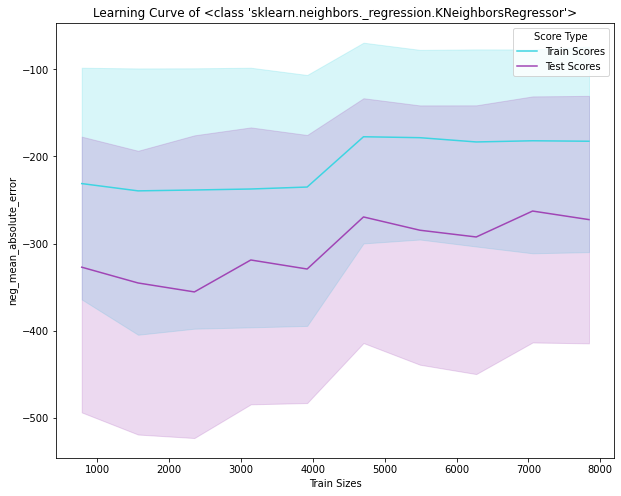

,fit_time,score_time,cv_MAE,MAE_test_score,cv_MAPE,MAPE_test_score,cv_MSE,MSE_test_score
DummyRegressor,0.003197,0.000934,-1435.093284,1406.315145,-0.720243,0.710594,-3.494597e+06,3.420915e+06
LinearRegression,0.017340,0.004421,-696.121128,690.760428,-0.265919,0.262341,-9.627924e+05,9.188949e+05
BayesianRidge,0.024633,0.004450,-696.276401,690.062320,-0.265744,0.261115,-9.630402e+05,9.185257e+05
GradientBoostingRegressor,0.875449,0.007326,-465.609562,514.729818,-0.181720,0.200277,-4.078765e+05,5.166373e+05
HistGradientBoostingRegressor,0.520477,0.012966,-223.334579,308.683190,-0.089470,0.118608,-9.612266e+04,2.007577e+05
DecisionTreeRegressor,0.030593,0.003694,-15.424262,199.865705,-0.006375,0.063727,-3.292218e+03,4.778257e+05
RandomForestRegressor,1.922895,0.051928,-21.412606,170.340685,-0.008396,0.054547,-4.264259e+03,2.464049e+05
ExtraTreesRegressor,1.839498,0.054272,-15.338349,97.955342,-0.006324,0.035140,-3.242712e+03,2.435977e+04
KNeighborsRegressor,0.005522,0.319333,-64.781139,27.727516,-0.023383,0.009908,-3.056977e+04,9.496011e+03


In [45]:
# ExtraTreesRegressor,GradientBoostingRegressor,HistGradientBoostingRegressor,LinearSVR
models = [DummyRegressor,LinearRegression,BayesianRidge,DecisionTreeRegressor,DecisionTreeRegressor,RandomForestRegressor,ExtraTreesRegressor,GradientBoostingRegressor,HistGradientBoostingRegressor,KNeighborsRegressor]

# quick_evalutaion(models, onehot_encode_train, onehot_encode_test, y_train, y_test, curve=True)

eval = quick_evalutaion(models, onehot_encode_train, onehot_encode_test, y_train, y_test,curve=True)
eval.sort_values("MAE_test_score", ascending=False)

## ASSUMING WE FILL THIS UP
We can observe the following for different family of models:
1. Linear Models(Linear Regression,BayesianRidge):
    - Low Variance, mae test scores and train cv scores little difference
    - Does not seems to suffers from major overfitting
    - Might be suffering from underfitting due to inductive biases.
    > Try out polynomial regression and evaluate the model performance
2. Distance Based models(KNeighborsRegressor):
    - Best performing model in terms of lowest MAE test scores. However,
    - Extremely High variance as seen from the large difference in CV test scores and validation test scores.
    - Severly overfitted to data
    - Might be suffering from slight underfitting.
    > Increase the number of neighbours to reduce overfitting
4. DecisionTree: 
    - Extremely High variance as seen from the large difference in CV test scores and validation test scores.
    - Low biases and able to obtain relatively lower MAE test score
    > Tune model better to reduce overfitting by limiting the model complexity
5. Ensemble Tree Models (RandomForest, GradientBoosting,ExtraTreesRegressor)
    - Relatively high variance
    - Does not suffer as much overfitting than decision tree, however, overfitting still occurs
    - Low biases and able to obtain lowest MAE test score ( out of all the family of models ) 
    > Tune model better to reduce overfitting by increasing regularization
    
Conclusions:
1. Ensemble Tree Models can produce promising results after reducing overfitting. Hence, further model tuning and reduction of feature space is required to reduce overfitting.
2. Linear models suffers from high biases. Hence, we can try to increase the model complexity to reduce overfitting.
3. KNeighborsRegressor not chosen due to it's extremely high 

# Model improvement

Our best models seems to be the ensemble Tree Models.

To further reduce the variance of these model and posilblity reduce the score of we will be trying the follow methods to see if there's an improvement

*  Log scaling to Target variable Price
*   Feature selection 
*   Compare Feature Scaling Methods
*   Hyperparameter tuning



##  Log Transformation to Target variable `Price`

From our EDA process, price has a very right skewed distribution. Skewness, the distortion from normal distribution, could affect linear models performances. 

Furtermore,  A distribution that is symmetric or nearly so is often easier to handle and interpret than a skewed distribution.  

To counteract this problem, we will be applying LogTransformation on the target variable.

$$ X_{Transformed} = log_e(1 + X)$$

Since we will be using the `FunctionTransformer` with parameters set to `np.log1p` which applies log transformation for us

In [25]:
tt = FunctionTransformer(np.log1p)

# Save a copy before applying log transformation to see difference
y_train_original = y_train.copy()

# Fit and transform training and test sets to log numercial values of target
y_train_log = tt.fit_transform(y_train)
y_test_log = tt.fit_transform(y_test)

display(y_train,y_test)

6962     8.721261
3789     7.113912
285      7.471122
137      7.823979
10991    7.595179
           ...   
12578    7.403037
3759     7.135379
9515     8.882050
10209    7.758931
3955     6.539840
Name: Price ($), Length: 9804, dtype: float64

12482    6.584144
6135     7.292615
9044     8.302524
13025    8.295533
14387    7.984635
           ...   
10620    8.782637
3165     8.452748
12605    8.209650
9468     7.839737
15071    8.701584
Name: Price ($), Length: 2452, dtype: float64

### Distribution before log scaling

In [26]:
fig = px.histogram(df_eda, x="Price ($)",title="Distribution of PC Price ($)")
fig.show()

### Distribution after log scale

In [27]:
fig = px.histogram(df_eda, x="Price ($)",log_x=True ,title="Logarithmic distribution of PC Price ($) ")
fig.show()

### Conclusion:

We can see that before log transforming Price, the distribution of Price was highly right skewed

After Log transform, the distribution of Price became more normalized and symmetrical. This will hopefully help models interpret better to data

---



## Feature Selection

We currently have 43 features thus we it is a good idea to reduce the complexity of a model and makes it easier to interpret.

We will start by attempting to reduce the number of features in our data. Our aim is to remove less powerful predictors from the data, to avoid our models overfitting to noise from less important features.


### Recursive Feature Elimination

RFE is a feature selection algorithm. I'll be using RandomforestRegressor to choose the features as it is able to ranking features by importance. Following this I'll fit the remaining features back into ExtraTreesRegressor and check for improvement to score and variance.

In order to select the optimal number of features to select with RFE. We will hyperparam tune the RFE model to extract out the number of features that has the lowest MAE 

>5 -95.055538 (19.994072)
>8 -27.220050 (1.824161)
>11 -24.753712 (0.932031)
>14 -22.476489 (1.976829)
>17 -16.241855 (2.123120)
>20 -15.630641 (1.112562)
>23 -15.661684 (1.154047)
>26 -15.605555 (1.080480)
>29 -15.645327 (1.131953)


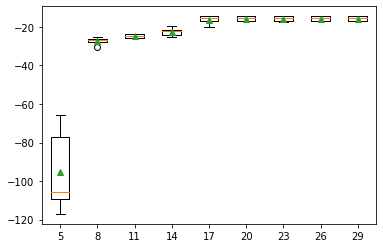

In [46]:

# explore the number of selected features for RFE
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
 
# get a list of models to evaluate
def get_models():
	models = dict()
	for i in range(5, 30,3):
		rfe = RFE(estimator=RandomForestRegressor(), n_features_to_select=i)
		model = ExtraTreesRegressor()
		models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	cv = KFold(n_splits=5,shuffle=True,random_state=1)
	scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
	return scores
 

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, onehot_encode_train, y_train)
	results.append(scores)
	names.append(name)
	print('>%s %.6f (%.6f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

Results:
```
>5 -0.038477 (0.001789)
>8 -0.011684 (0.000614)
>11 -0.007859 (0.002017)
>14 -0.006384 (0.000532)
>17 -0.006379 (0.000522)
>20 -0.006383 (0.000530)
>23 -0.006375 (0.000517)
>26 -0.006384 (0.000532)
>29 -0.006387 (0.000537)
```
We can see that when eliminated to just 23 features, the MAE score is the lowest. Hence will choose to RFE till there's 23 features remaining



In [151]:
def single_evalutaion(pipeline, X_train, X_test, y_train, y_test, metrics=["neg_mean_squared_error","neg_mean_absolute_error","neg_mean_absolute_percentage_error"],curve = True, cv = KFold(n_splits=5,shuffle=True,random_state=1)):
    hist = {}

    pipeline.fit(X_train, y_train)
    test_prediction = pipeline.predict(X_test) # Testing on validation dataset

    MAPE_test = mean_absolute_percentage_error(y_test, test_prediction)
    MAE_test = mean_absolute_error(y_test, test_prediction)
    MSE_test = mean_squared_error(y_test,test_prediction)

    # 5-Fold CV
    cv_hist = cross_validate(pipeline, X_train, y_train, scoring=metrics,verbose=1)

    # Record down the performance
    hist['ExtraTreeRegressor (Tuned)'] = dict(
        # train_acc = acc_train,
        fit_time = cv_hist['fit_time'].mean(),
        score_time = cv_hist['score_time'].mean(),
        cv_MAE = cv_hist['test_neg_mean_absolute_error'].mean(),
        MAE_test_score = MAE_test,
        cv_MAPE = cv_hist['test_neg_mean_absolute_percentage_error'].mean(),
        MAPE_test_score = MAPE_test,
        cv_MSE = cv_hist['test_neg_mean_squared_error'].mean(),
        MSE_test_score = MSE_test
    )

    # Plotting the learning Curve of each Model using: neg_mean_squared_log_error
    if curve:
      fig, ax = plt.subplots(figsize=(10, 8))
      train_sizes = np.linspace(.1, 1.0, 10)
      train_sizes, train_scores, test_scores = learning_curve(pipeline, X_train, y_train, cv = cv, n_jobs = -1, train_sizes = train_sizes, scoring="neg_mean_absolute_error")
      scores = pd.DataFrame({
      "Train Sizes" : np.tile(train_sizes, train_scores.shape[1]),
      "Train Scores" : train_scores.flatten(),
      "Test Scores" : test_scores.flatten()
      }).melt(value_vars=["Train Scores", "Test Scores"], var_name="Score Type", value_name="Scores", id_vars=["Train Sizes"])
      # print(f"THis is train_sizes:\n{train_sizes}\n This is train_scores:\n{train_scores}\n This is test_scores:{test_scores}")
      sns.lineplot(data=scores, x="Train Sizes", y="Scores", hue="Score Type", ax = ax ,palette=['#3DD5E2', '#A045B5'])
      ax.set_title(f"Learning Curve of ExtraTreeRegressor (Tuned)")
      ax.set_ylabel("neg_mean_absolute_error")
      ax.set_xlabel("Train Sizes")
      plt.show()

    # plt.tight_layout()
    # display(pd.DataFrame(hist).T)

    results = pd.DataFrame(hist).T
    return results
    # plt.show()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.9min finished


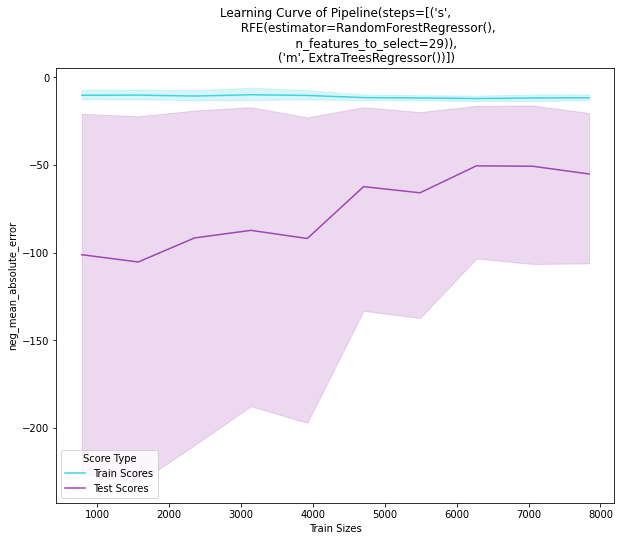

,MAE_test_score,MAPE_test_score,MSE_test_score,cv_MAE,cv_MAPE,cv_MSE,fit_time,score_time
RandomForestRegressor,109.336253,0.039041,30681.600163,-15.346189,-0.006329,-3245.230196,34.987605,0.0524


In [91]:
reg = Pipeline([
        ('Feature Selection',RFE(estimator=RandomForestRegressor(), n_features_to_select=23)),
        ('Model', ExtraTreesRegressor(random_state=42))
    ])
    
RFE_et = single_evalutaion(reg, onehot_encode_train, onehot_encode_test,y_train,y_test)
RFE_et

## Comparing Feature Scaling methods

While I was reading up on scaling. I read an article that mentioned that descision tree based models **dont require scaling** of feature as they are invariant aka doesn't change from any monotonic transformations of any feature/input/independent variable.

In my pre-processing, I scaled all feautures with StandardScalar ( Both Method 2 and 3 ) removing the mean and scaling to unit variance. Lets refit the model without standardsclar and also try MinMaxScalar then comparing the two models ( and baseline ) against each other

### Unscaled

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


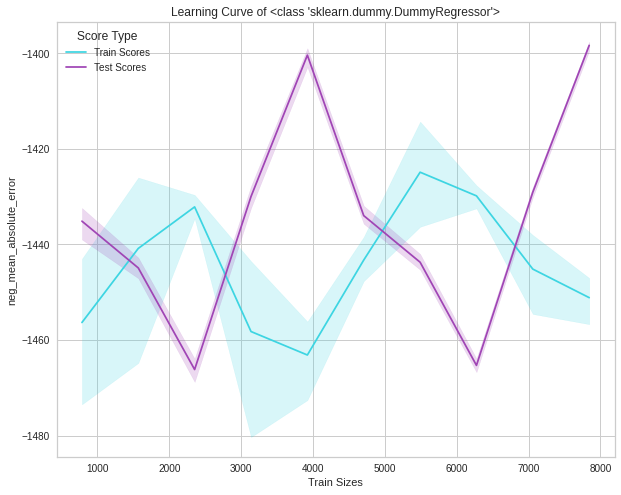

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    9.6s finished


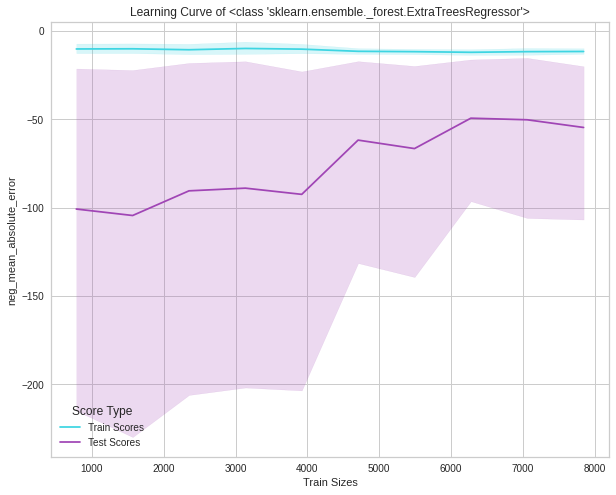

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.7s finished
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



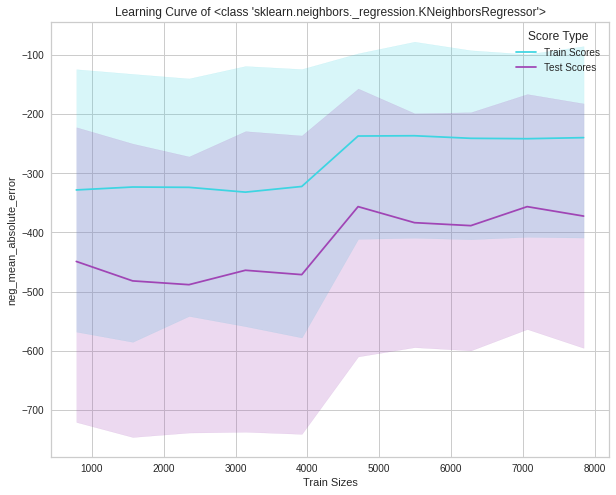

,fit_time,score_time,cv_MAE,MAE_test_score,cv_MAPE,MAPE_test_score,cv_MSE,MSE_test_score
DummyRegressor,0.003182,0.000932,-1435.093284,1406.315145,-0.720243,0.710594,-3.494597e+06,3.420915e+06
KNeighborsRegressor,0.005719,0.332225,-87.069584,26.546373,-0.032431,0.010142,-8.230362e+04,1.467792e+04
ExtraTreesRegressor,1.855746,0.053957,-15.338349,16.158351,-0.006324,0.006117,-3.242712e+03,3.834048e+03


In [105]:
hist = {}
# Unscaled

models = [DummyRegressor,ExtraTreesRegressor,KNeighborsRegressor]
unscaled_scores = quick_evalutaion(models, X_train_unscaled, X_test_unscaled, y_train, y_test,curve=True)
unscaled_scores.sort_values("MAE_test_score", ascending=False)

### StandardScaled

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


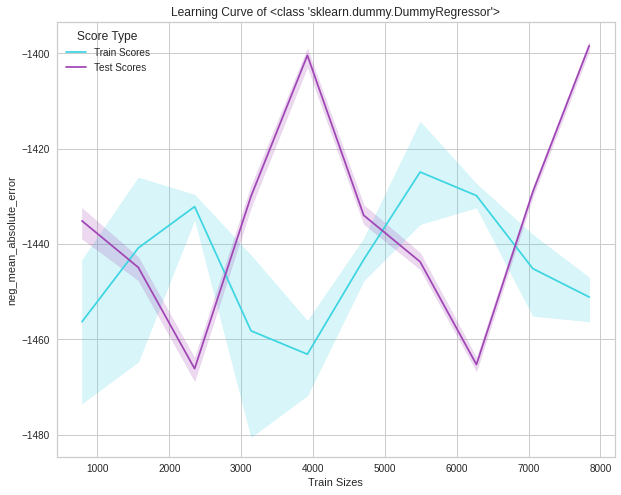

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    9.5s finished


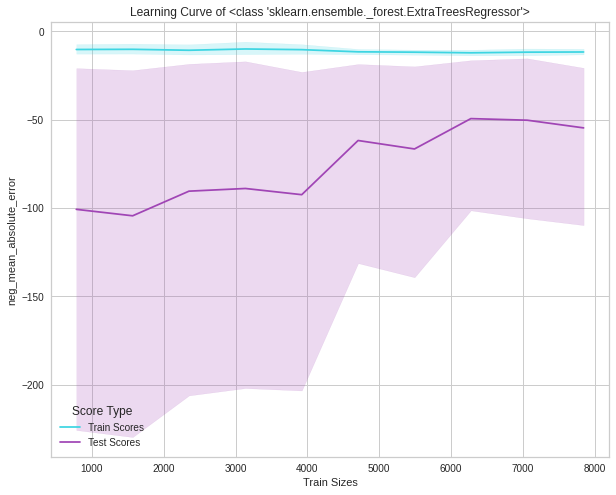

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.6s finished
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



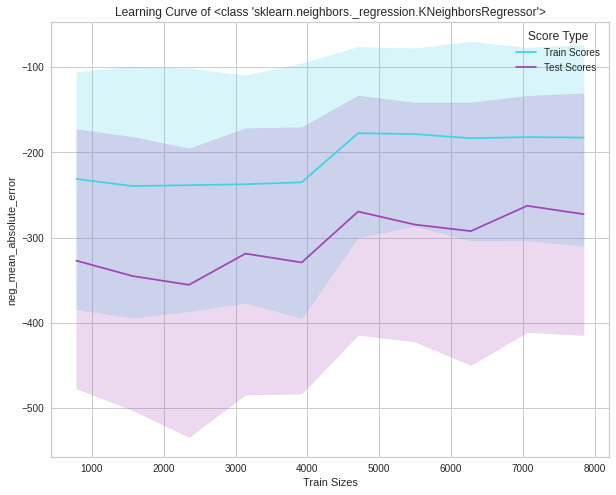

,fit_time,score_time,cv_MAE,MAE_test_score,cv_MAPE,MAPE_test_score,cv_MSE,MSE_test_score
DummyRegressor,0.003490,0.000878,-1435.093284,1406.315145,-0.720243,0.710594,-3.494597e+06,3.420915e+06
ExtraTreesRegressor,1.846075,0.054199,-15.338349,97.955342,-0.006324,0.035140,-3.242712e+03,2.435977e+04
KNeighborsRegressor,0.005672,0.322052,-64.781139,27.727516,-0.023383,0.009908,-3.056977e+04,9.496011e+03


In [106]:
#StandardScaled
models = [DummyRegressor,ExtraTreesRegressor,KNeighborsRegressor]
StandardScaled_scores = quick_evalutaion(models, onehot_encode_train, onehot_encode_test, y_train, y_test,curve=True)
StandardScaled_scores.sort_values("MAE_test_score", ascending=False)

### Min_max Scaled

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


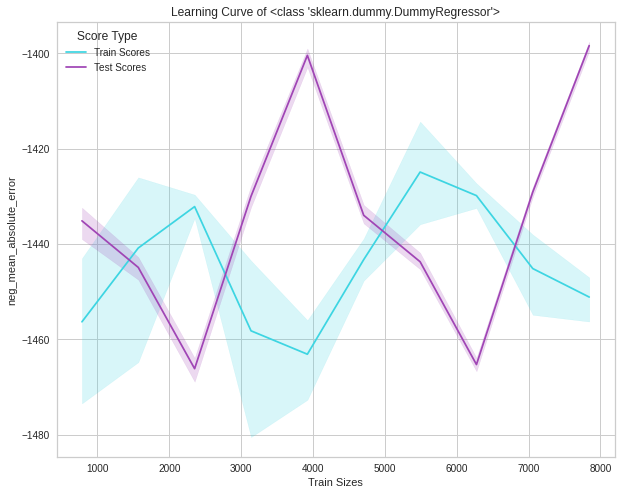

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    9.5s finished


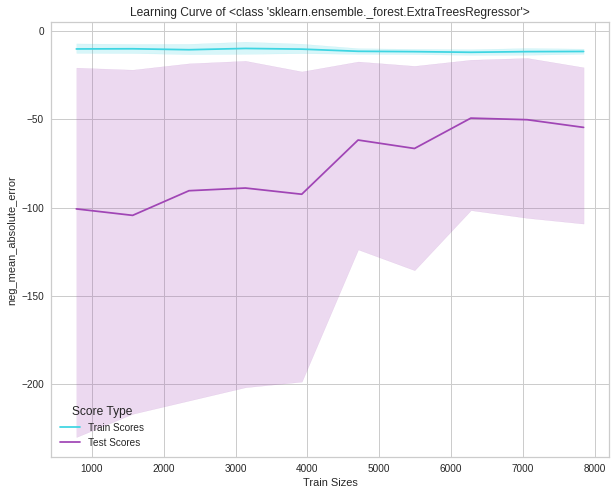

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.0s finished
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



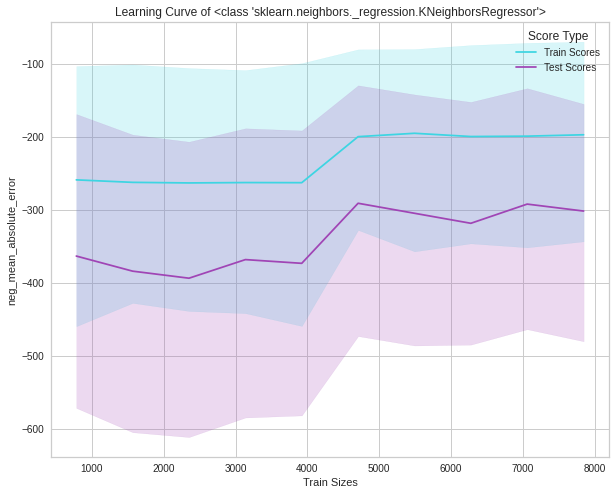

,fit_time,score_time,cv_MAE,MAE_test_score,cv_MAPE,MAPE_test_score,cv_MSE,MSE_test_score
DummyRegressor,0.003176,0.000903,-1435.093284,1406.315145,-0.720243,0.710594,-3.494597e+06,3.420915e+06
KNeighborsRegressor,0.006448,0.391336,-64.787387,23.071246,-0.024114,0.008789,-3.017296e+04,6.123227e+03
ExtraTreesRegressor,1.843320,0.054045,-15.338349,17.626618,-0.006324,0.006715,-3.242712e+03,3.915061e+03


In [107]:
#Min_max Scaled
models = [DummyRegressor,ExtraTreesRegressor,KNeighborsRegressor]
MinMaxScaled_scores = quick_evalutaion(models, MinMax_train, MinMax_test, y_train, y_test,curve=True)
MinMaxScaled_scores.sort_values("MAE_test_score", ascending=False)

Observations: 

* For ExtraTreesRegressor, applying no scaling seems to outperform both StandardScalar and MinMaxScalar.

* For KNeighborsRegressor, applying Min_Max scaling seems to have slightly improve performance of the model.

* Applying StandardScaling decreases both model performance significantly

## Hyper Parameter Tuning -ExtraTreesRegressor

just try out a wide range of values and see what works using Gridsearch techniques

We will try adjusting the following set of hyperparameters:

* n_estimators = number of trees in the foreset

* max_features = max number of features considered for splitting a node

* max_depth = max number of levels in each decision tree

* min_samples_split = min number of data points placed in a node before the node is split

* min_samples_leaf = min number of data points allowed in a leaf node

* bootstrap = method for sampling data points (with or without replacement)

In [30]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


we will be using the whole training set (Train+validation) to tune the hyperparameters

In [32]:
# Use the random grid to search for best hyperparameters
# create the base model extreetrees to tune
et = ExtraTreesRegressor()
# Random search of parameters, using 3 fold cross validation, 

# search across 100 different combinations, and use all available cores
et_random = RandomizedSearchCV(estimator = et, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
et_random.fit(onehot_encode_train, y_train)

et_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



{'bootstrap': False,
 'max_depth': 40,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1400}

```
{'bootstrap': False,
 'max_depth': 40,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1400}
```

# Model Evaluation

I've choosen ExtraTreesRegressor to be my Final Model

Evaluate on Holdout test set

In [153]:
Final_model = Pipeline([
        ('Feature Selection',RFE(estimator=RandomForestRegressor(), n_features_to_select=23)), # Number 
        ('Model', ExtraTreesRegressor(random_state=42,bootstrap= False, max_depth= 40,max_features= 'auto',min_samples_leaf= 1,min_samples_split= 2,n_estimators= 1400)) # Put hyperparam
    ])


## Compare to stupid baseline

In [145]:
Baseline_model = Pipeline([
        ('Model', DummyRegressor()) 
    ])

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


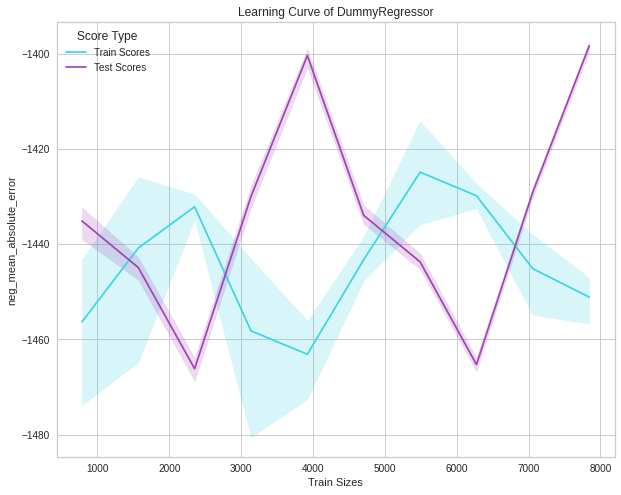

,MAE_test_score,MAPE_test_score,MSE_test_score,cv_MAE,cv_MAPE,cv_MSE,fit_time,score_time
DummyRegressor,1406.315145,0.710594,3.420915e+06,-1435.093284,-0.720243,-3.494597e+06,0.003427,0.001067


In [150]:
Baseline_score = single_evalutaion(Baseline_model,MinMax_train, MinMax_test, y_train, y_test,curve=True)
Baseline_score

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  4.6min finished


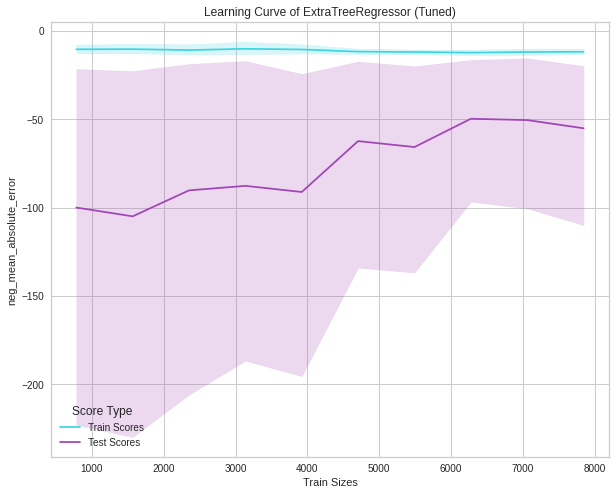

,MAE_test_score,MAPE_test_score,MSE_test_score,cv_MAE,cv_MAPE,cv_MSE,fit_time,score_time
ExtraTreeRegressor (Tuned),17.525948,0.006677,3893.498788,-15.351024,-0.006332,-3246.983216,54.187011,0.684427


In [154]:
Final_score = single_evalutaion(Final_model,MinMax_train, MinMax_test, y_train, y_test,curve=True)
Final_score.sort_values("MAE_test_score", ascending=False)

# Errors of model

## Residual Plot

In [99]:
from yellowbrick.regressor import ResidualsPlot

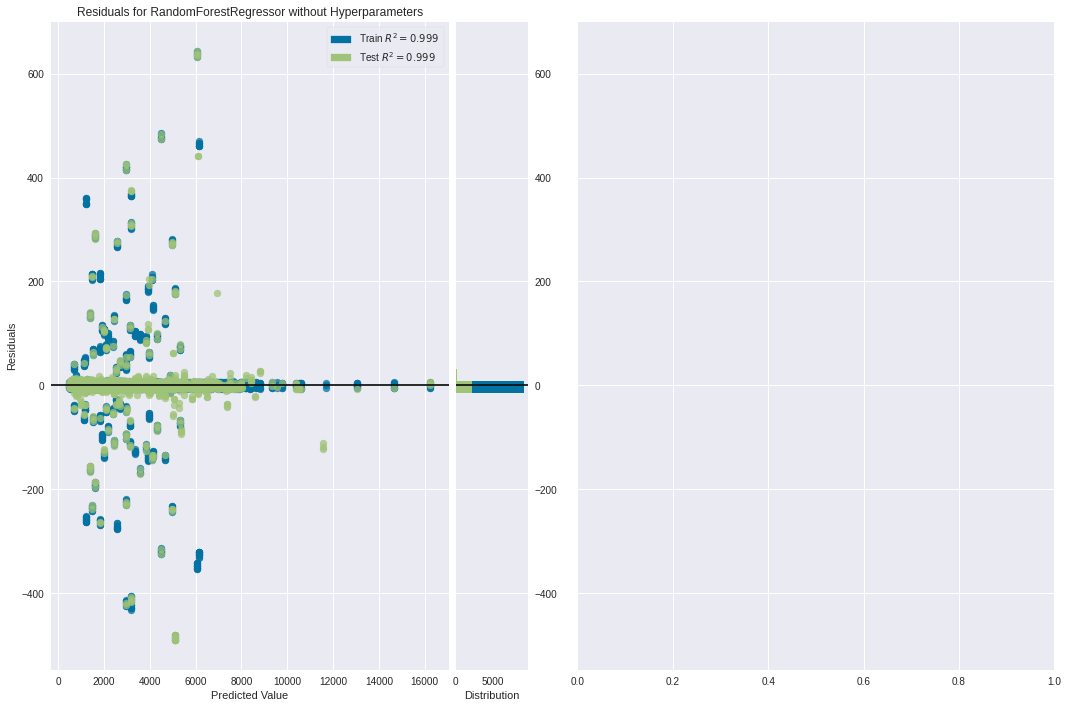

In [101]:
ETR = ExtraTreesRegressor()

residuals = y_test - y_pred

fig, ax = plt.subplots(figsize=(10, 8), tight_layout=True)
ax.scatter(x=range(len(residuals)), y=residuals, alpha=.3)
ax.set_title("Residual Plot")
ax.set_ylabel("Residual")
ax.set_xlabel("Data Point")
fig.show()

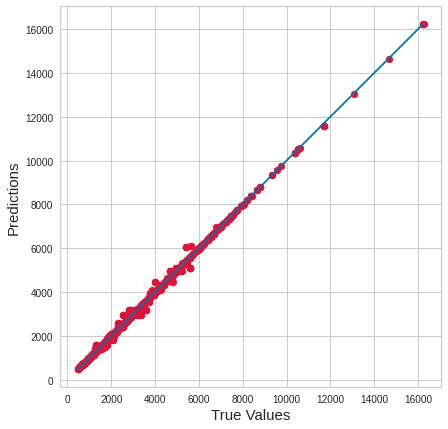

In [155]:
# plot error plot

pred_test = Final_model.predict(MinMax_test)

fig, ax = plt.subplots(figsize=(7,7))
plt.scatter(y_test, pred_test, c='crimson')
p1 = max(max(pred_test), max(y_test))
p2 = min(min(pred_test), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
ax.set_aspect('equal')
plt.show()

In general, from the plot above we can clearly visualize that the prediction follows closed to the True Values

This indicates that the model performs relatively well for PC prices of almost all ranges

Howevever, There is a slight larger margin around True values 3k

Model not able to predict prices of PC around that 3k mark as well as 

Able to predict outlier datapoint very well, no datapoints above the 10k mark that has a high difference margin from predictions

## Feature Importance

Text(0.5, 0, 'Feature Name')

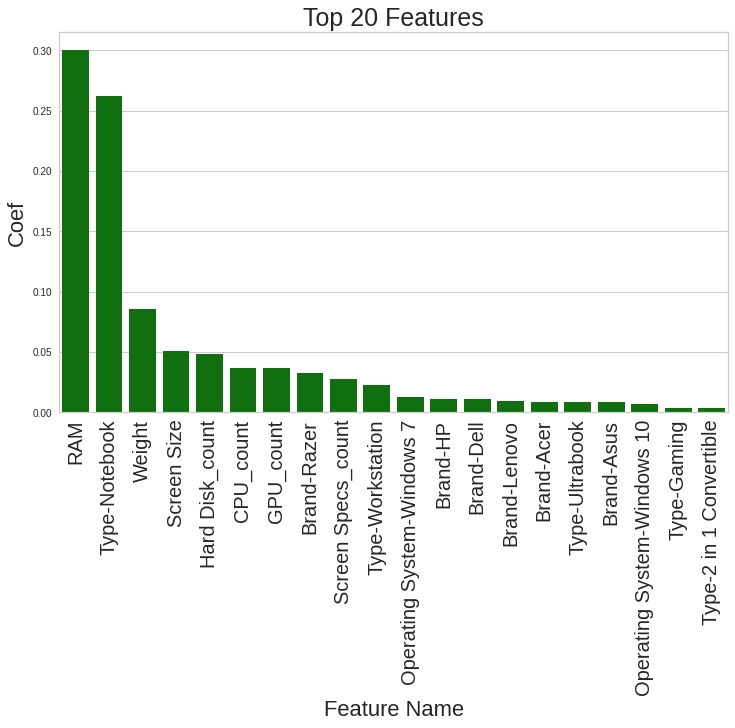

In [164]:
# Get the names of each feature
support = Final_model.named_steps["Feature Selection"].support_

feature_names = np.array(MinMax_test.columns)

# Get the coefficients of each feature
coefs = Final_model.named_steps["Model"].feature_importances_

# Zip coefficients and names together and make a DataFrame
zipped = zip(feature_names[support], coefs)
df = pd.DataFrame(zipped, columns=["feature", "value"])
# Sort the features by the absolute value of their coefficient
df["abs_value"] = df["value"].apply(lambda x: abs(x))
df["colors"] = df["value"].apply(lambda x: "green" if x > 0 else "red")
df = df.sort_values("abs_value", ascending=False)


fig, ax = plt.subplots(1, 1, figsize=(12, 7))
sns.barplot(x="feature",
            y="value",
            data=df.head(20),
           palette=df.head(20)["colors"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=20)
ax.set_title("Top 20 Features", fontsize=25)
ax.set_ylabel("Coef", fontsize=22)
ax.set_xlabel("Feature Name", fontsize=22)